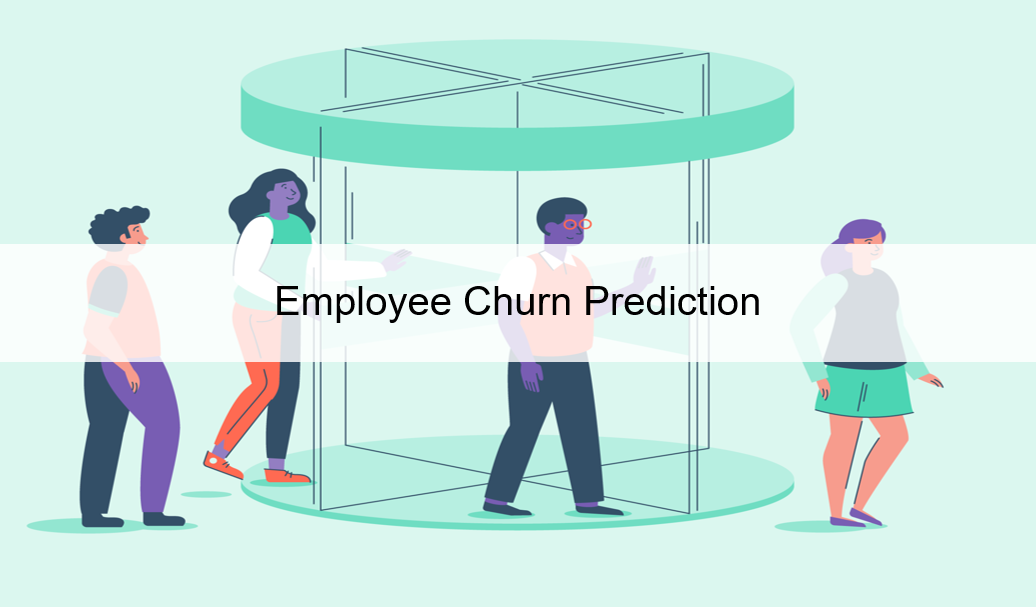

#### Data Goreng - Chen Bao Gang | Ng Boon Jane | Sam Tey | Soo Kar Lok | Yin Khar Shin 

## List of Content

* [Introduction](#Introduction)  
    * [Overview](#Overview)
    * [Research Questions](#Research-Questions)
    * [Research Objectives](#Research-Objectives)
    * [Significance](#Significance)
    * [Motivations](#Motivation)
    * [Related Work](#Related-Work)
* [Methodology](#Methodology)
    * [Dataset Description](#Dataset-Description)
    * [Data Pre-processing Methods](#Data-Pre-processing-Methods)
    * [Machine Learning Algorithms](#Machine-Learning-Algorithms)
* [Data Analysis](#Data-Analysis)
    * [Data Overview](#Data-Overview)
    * [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Data Pre-processing](#Data-Pre-processing)
    * [Data Cleaning](#Data-Cleaning)
    * [Data Integration - Correlation](#Data-Integration---Correlation)
    * [Data Reduction - Principle Component Analysis (PCA)](#Data-Reduction---Principle-Component-Analysis-(PCA))
* [Modelling](#Modelling)
    * [Train Test Split](#Train-Test-Split)
    * [Model Building](#Model-Building)
    * [Model Evaluation](#Model-Evaluation)
    * [Feature Importance](#Feature-Importance)
* [Conclusion](#Conclusion)
* [Future Work](#Future-Work)
* [Reference](#Reference)


---

## Introduction

#### Overview 
Employee is an individual hired by a person or an organization as a part-timer of full-timer to work and complete a specific task, in exchange of wages or salary. According to the Statistics of Labour Force 2022, there is a continuous rise in employment rate compare to previous year, indicating employees are valuable assets to employer or an organization as they have major contribution in the organization’s profits and values (Department of Statistics Malaysia, 2022). However, employees will resign if employee matters are not handled properly. Employee resignation happened due to attrition (retirement, death or health issue), push factors (poor culture and management, overworked or underpay) or pull factors (better pay, more benefits or greater flexibility). Employee resignation is indeed a normal phenomenon but abnormal if resignation happens frequently and organizations will have no clue on what is happening and how to prevent. Prior research emphasises the employee churn is a challenging issue as employee plays an important role in driving the business performance and productivity. Employee resignation can cause negative impacts towards organizations in terms of cost, time and effort. Thus, it would be beneficial if action is taken prior to the employee resignation by accurately focusing on understanding and predicting the employee churn.


#### Research Questions 
- What is the relationship between the factors and employee churn? 

- Which factors most lead to the employee churn? 

- How do the factors help in employee recruitment and detect employee churn? 


#### Research Objectives 
- To determine the relationship between factors and employee churn. 

- To identify the significant factors that causes employee churn. 

- To predict the churner’s characteristics and probability to churn. 


#### Significance
- Benefits to organization's management team, hiring manager and human resource department. 

- Insighful information on the root causes of employee churn and leads towards a better understanding on what causing employee churn. 

- Provide an accuracy indicator to detect potential churner.

- Important guideline for retention effort by enhancing employee policy and improvising retention strategies to reduce employee’s dissatisfaction.

- Act as a tool to alter employee benefits when recruiting and screening on potential talents who is unlikely to resign within a short period of time.


#### Motivation 
Motivations to look into the employee relevant matters: 
1. The Great Resignation [Great Resignation](https://www.cnbc.com/video/2022/03/21/great-resignation-goes-global-and-shakes-up-labor-market-for-good.html#:~:text=The%20term%20Great%20Resignation%20was,economies%20are%20experiencing%20similar%20trends), also known as the Big Quit and the Great Reshuffle, is an ongoing economic trend in which employees have voluntarily resigned from their jobs, beginning in early 2021, primarily in the United States. It started to go global and continues to 2022 where other developed countries are experiencing the same issue, despite labour shortage and high umemployment. Possible causes include wage stagnation amid rising cost of living, long-lasting job dissatisfaction, and safety concerns of the COVID-19 pandemic [Great Resignation Survey](https://www.pewresearch.org/fact-tank/2022/03/09/majority-of-workers-who-quit-a-job-in-2021-cite-low-pay-no-opportunities-for-advancement-feeling-disrespected/#:~:text=The%20COVID%2D19%20pandemic%20set,20%2Dyear%20high%20last%20November). 


2. Frequent employee resignation is happenning among our workplace. 


#### Related Work
A comparison table of previous research studies on employee churn prediction which consists of methodology and contributing factor that causes employee atrition with author, title and published year. [Literature review](https://drive.google.com/file/d/13x8fZyY79CsjMEUS9Q7IqJaUNeiHdV0l/view?usp=sharing)

-----

## Methodology 

#### Dataset Description

- Retrieved from Kaggle [IBM Human Resource Data](https://www.kaggle.com/categorical_dfsets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- A fictional data set created by IBM data scientists that contains a total of 1471 records with 34 independent variables and 1 dependent variable 

#### Data Analysis
- Univariate, Bivariate and Multivariate Analysis
- Visualization: Histogram, Boxplot, Barplot

#### Data Pre-processing Methods
- Data Cleaning: Drop and replace
- Data Integration: Correlation - check the relationship between variables
- Data Transformation: Label Encoding - convert the labels into a numeric form so as the machine-readable form. **Different from One-Hot Encoding, which is the process of creating dummy variables.
- Data Reduction: Principle Component Analysis (PCA)

#### Model Building
- Train test split 
- Machine Learning: Logistic Regression, Random Forest, Decision Tree 
- K fold cross validation

#### Model Evaluation 
- Accuracy, Confusion Matrix, Feature Importance

---

### Data Analysis
#### Data Overview

#### <a style="color:blue;">Import libraries</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

#### <a style="color:blue;">Import dataset and set 'EmployeeNumber' as index. 'EmployeeNumber' is removed as variable because it represents an employee identity.</a>

In [2]:
dataset = pd.read_csv('Dataset - IBM HR Employee Attrition.csv')
dataset = dataset.set_index(dataset['EmployeeNumber'])
dataset = dataset.drop(columns = 'EmployeeNumber')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert Attrition to numerical label - Yes indicates 1 and No indicates 0</a>

In [3]:
dataset['Attrition'] = dataset['Attrition'].replace(to_replace=['Yes', 'No'], value=[1, 0])
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


#### <a style="color:blue;">Dataset overview</a>
There are 1470 records (rows) and 34 attributes (columns). Dataset are mostly made up of numerical value (int64) and categorical value (object). Statistics are provided for numerical variables only. 

In [4]:
print ("Total rows & columns: " , dataset.shape, '\n') 
dataset.info()

Total rows & columns:  (1470, 34) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0


**Observations:**

- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 km radius** from the organization. However, there are some extreme values, seeing as the maximum value is 29 km.
- **The average monthly income of an employee is about 6500.** It has a high range of values from 1K-20K, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around 8400) and the maximum value (nearly 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees.
- **Average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- Average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year as the median value is 1.

#### <a style="color:blue;">Exploratory Data Analysis (EDA)</a>

1. Attrition value 
- This is an imbalanced dataset. 

In [38]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

2. Declare Variables

In [39]:
#Target 
target = ['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical_val = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical_val = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
numerical_df = dataset[numerical_val]
categorical_df = dataset[categorical_val] #addin attrition value 
categorical_df.insert(0, 'Attrition', dataset['Attrition'])

3. Distribution Checking
- Numerical boxplot
- The MonthlyIncome attribute showed a significant amount of outliers, however, we will not remove it as it is a fact. There are many employees with talents making good amount of salary in the industry.
- The YearsAtCompany attribute presented the outliers as well, many generation X served at one company for more than 20 years or above. It is a fact.
- The PercentSalaryHike tend to right-skewed(first quartile), some companies will increase the salary yearly with 12%-18%.

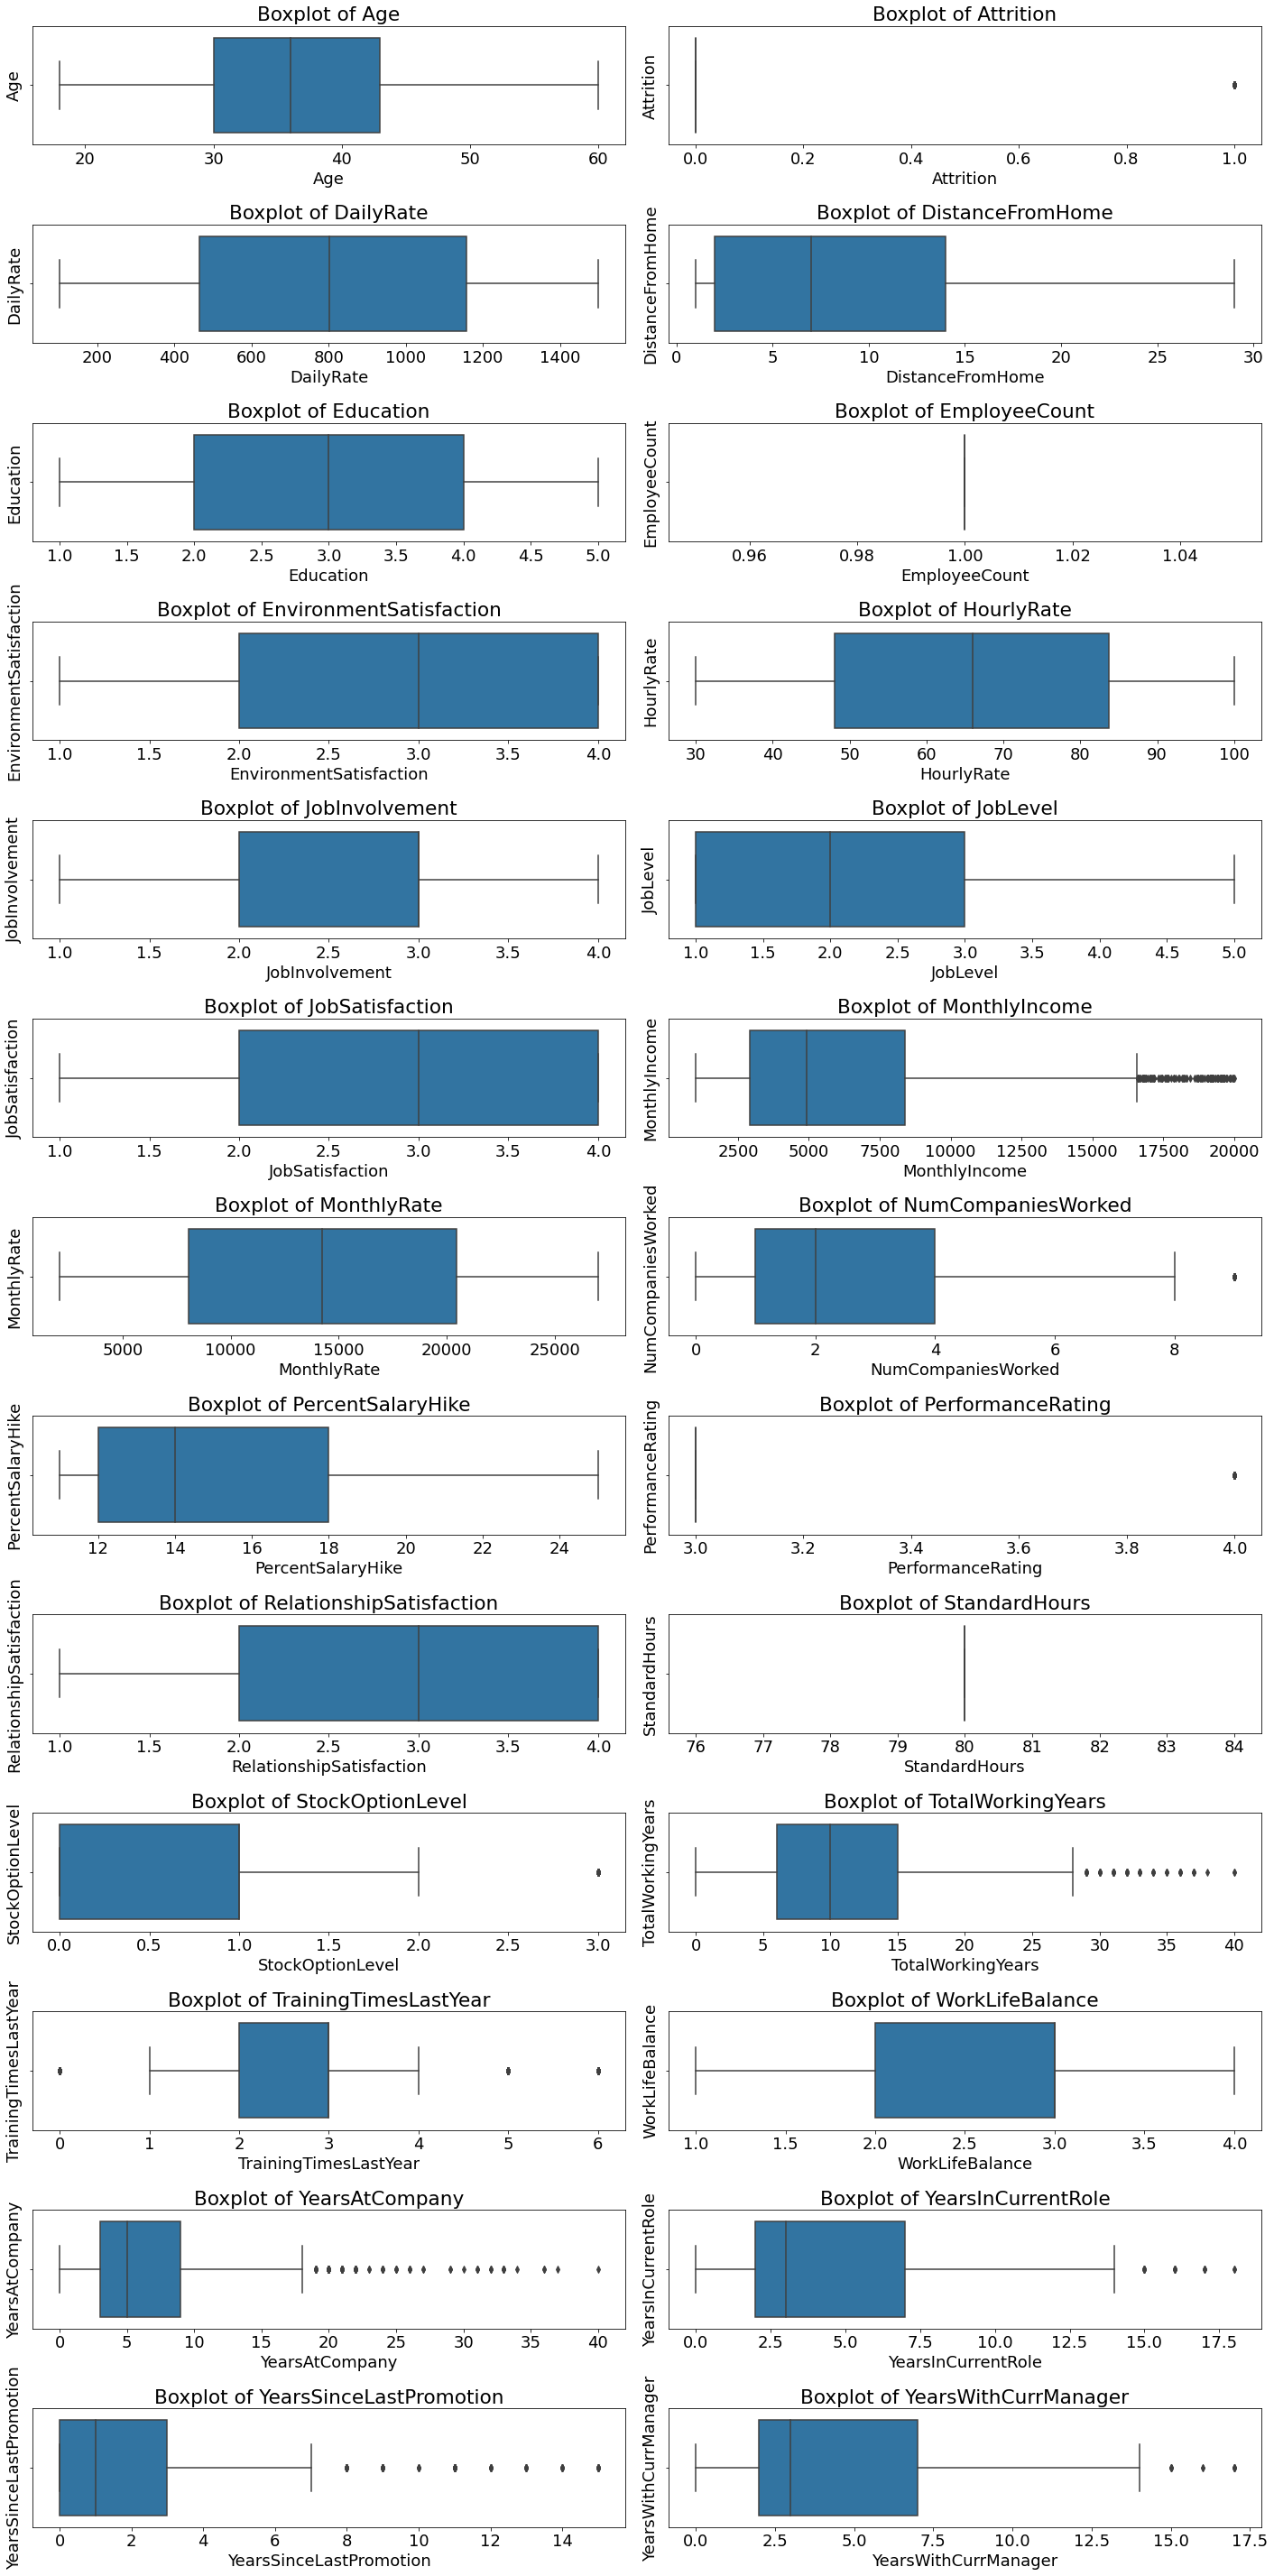

In [40]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel=k, ylabel=k)
        ax[i, j].set(title='Boxplot of '+k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

- Categorical histogram

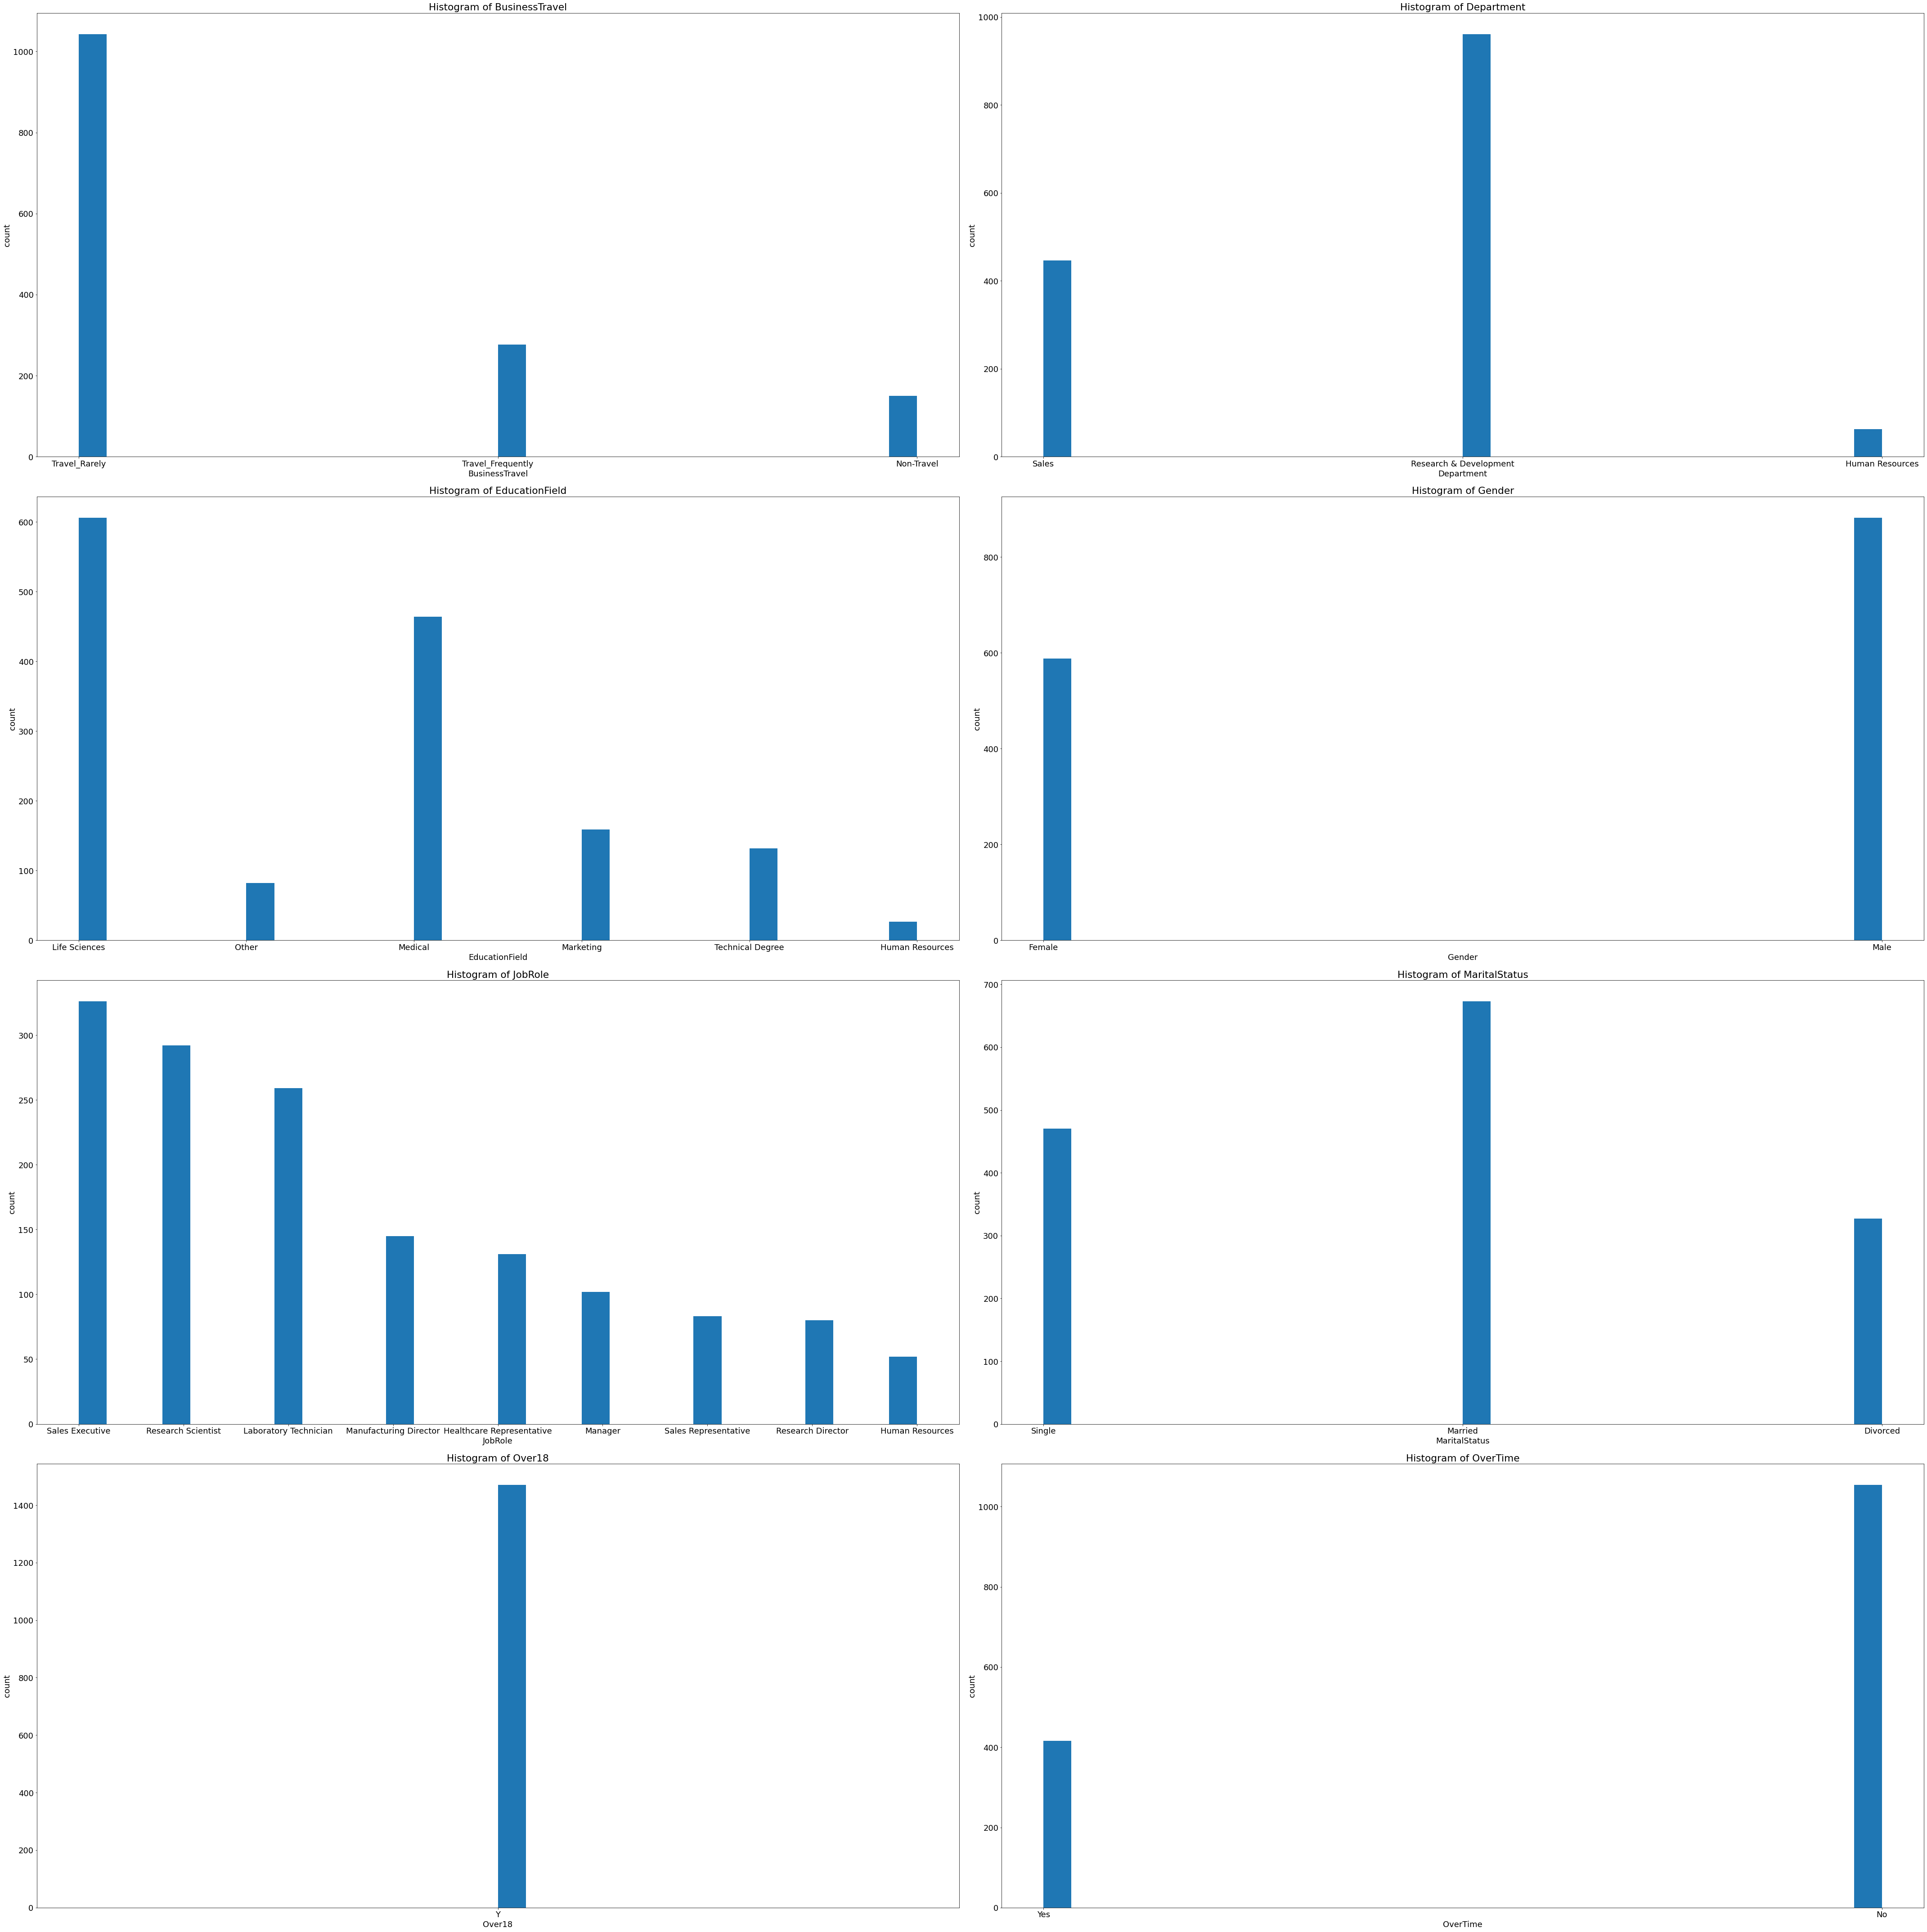

In [41]:
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(4,2, figsize=(60,60))

categorical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = categorical_val[categorical_var_count]

        ax[i, j].hist(categorical_df[x],bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].set(title='Histogram of '+x)
        categorical_var_count = categorical_var_count + 1
        
plt.tight_layout()

| Variable | Incomplete Data | Noisy Data | Inconsistent Data | Intentional Data | Meaningless Data |
| --- | --- | --- | --- | --- | --- |
|Age	|No	|No	|No	|No	|No|
|Attrition	|No	|No	|No	|No	|No|
|DailyRate	|No	|No	|No	|No	|No|
|DistanceFromHome	|No	|No	|No	|No	|No|
|Education	|No	|No	|No	|No	|No|
|EmployeeCount	|No	|No	|No	|**Yes**	|**Yes**|
|EnvironmentSatisfaction	|No	|No	|No	|No	|No|
|HourlyRate	|No	|No	|No	|No	|No|
|JobInvolvement	|No	|No	|No	|No	|No|
|JobLevel	|No	|No	|No	|No	|No|
|JobSatisfaction	|No	|No	|No	|No	|No|
|MonthlyIncome	|No	|**Yes**	|No	|No	|No|
|MonthlyRate	|No	|No	|No	|No	|No|
|NumCompaniesWorked	|No	|**Yes**	|No	|No	|No|
|PercentSalaryHike	|No	|No	|No	|No	|No|
|PerformanceRating	|No	|**Yes**	|No	|No	|No|
|RelationshipSatisfaction	|No	|No	|No	|No	|No|
|StandardHours	|No	|No	|No	|**Yes**	|**Yes**|
|StockOptionLevel	|No	|**Yes**	|No	|No	|No|
|TotalWorkingYears	|No	|**Yes**	|No	|No	|No|
|TrainingTimesLastYear	|No	|**Yes**	|No	|No	|No|
|WorkLifeBalance	|No	|No	|No	|No	|No|
|YearsAtCompany	|No	|**Yes**	|No	|No	|No|
|YearsInCurrentRole	|No	|**Yes**	|No	|No	|No|
|YearsSinceLastPromotion	|No	|**Yes**	|No	|No	|No|
|YearsWithCurrManager	|No	|**Yes**	|No	|No	|No|
|BusinessTravel	|No	|No	|No	|No	|No|
|Department	|No	|No	|No	|No	|No|
|EducationField	|No	|No	|No	|No	|No|
|Gender	|No	|No	|No	|No	|No|
|JobRole	|No	|No	|No	|No	|No|
|MaritalStatus	|No	|No	|No	|No	|No|
|Over18	|No	|No	|No	|**Yes**	|**Yes**|
|OverTime	|No	|No	|No	|No	|No|


The table summarized the variables are either incomplete, noisy, inconsistent, intentional or meaningless.
It can be observed that majority of the variables are normal and good for further analysis.

#### Descriptive and Exploratory Analysis

1. Numerical Histogram
- Uivariate Analysis
- To explore the numerical variable distributions. 

**It can be observed that:**
- Most of the employees' age are between 30 and 40. 
- Most of them stay near to the company.
- Majority are having a monthly income between 2500 and 5000. 
- Most of them worked for 5 to 10 years, yet majority worked for 10 years. 

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 30 and 40.

- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**. And majority of the employees showed **low (1) to medium-low (2) job level**, which  indicating that the majority of workers are in entry / mid-level positions in the organization and having a monthly income between 2500 and 5000

- **DistanceFromHome also has a right-skewed distribution**, meaning most of them stay near to the company but there are a few that live further away.

- **On average, an employee has worked at 2.7 companies.** Most employees have worked at **only 1 company.**

- Majority of the employees either have **none or very less stock options.**

- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** Majority of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 

- **The YearsInCurrentRole distribution has three peaks at 0, 2 and 7.** There are a few employees that have stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees and the like.

- The distributions of **DailyRate, HourlyRate and MonthlyRate** appear to be **uniform** and do not provide much information.

<Figure size 432x288 with 0 Axes>

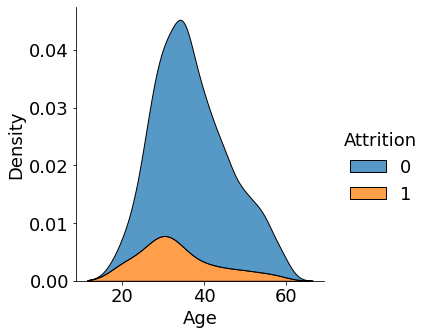

<Figure size 432x288 with 0 Axes>

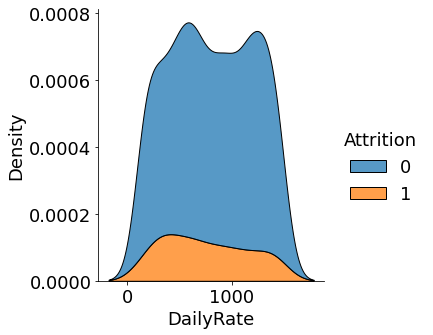

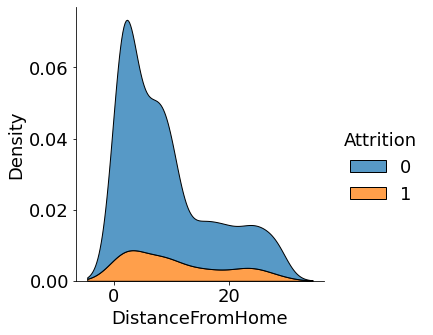

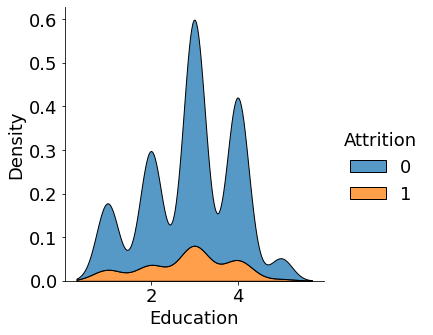

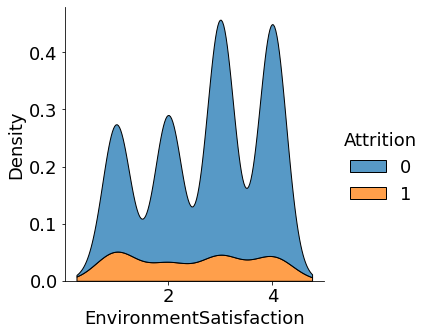

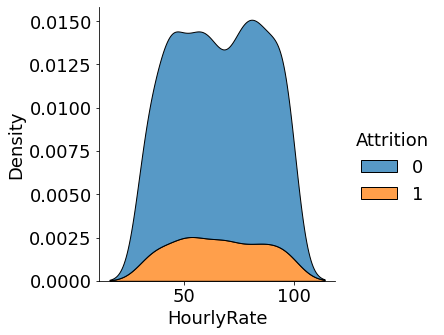

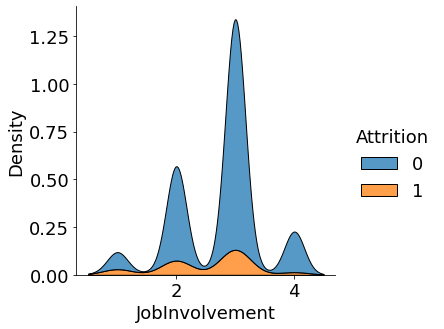

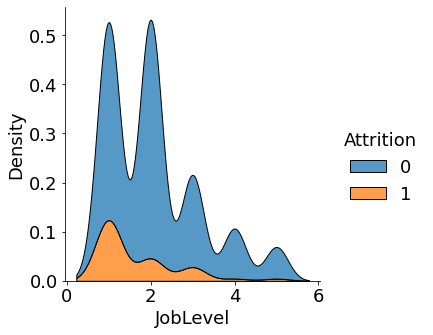

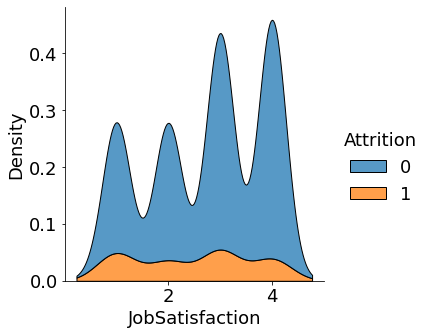

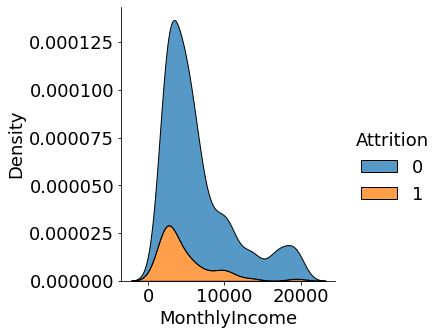

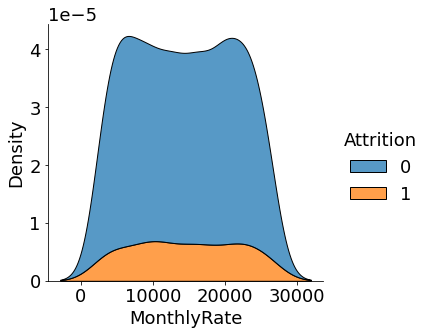

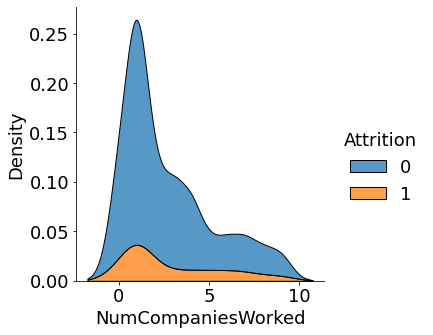

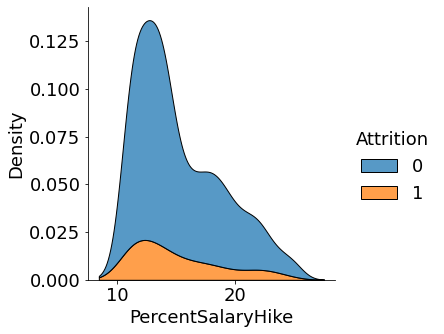

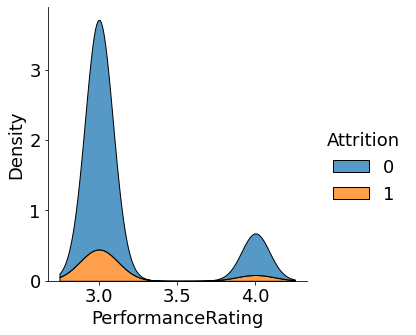

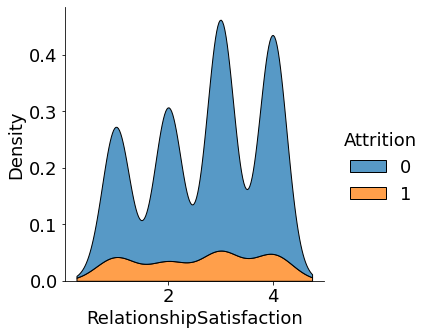

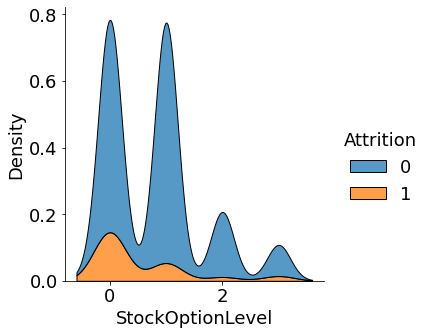

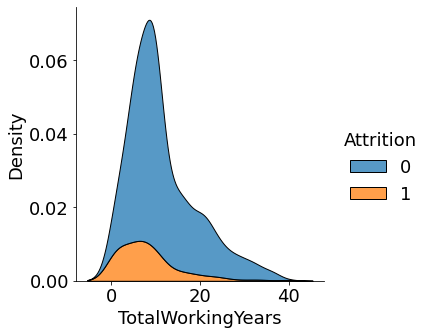

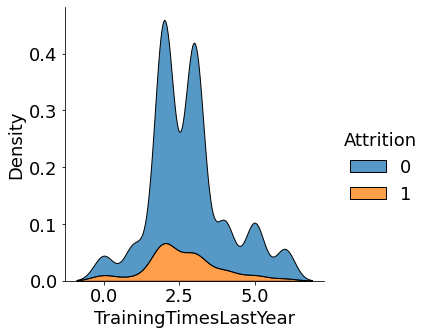

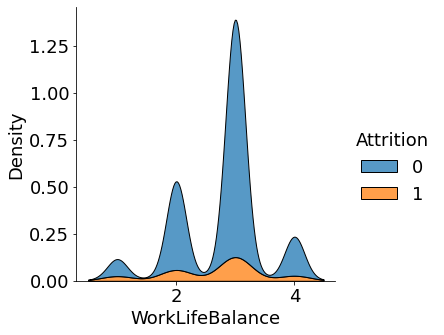

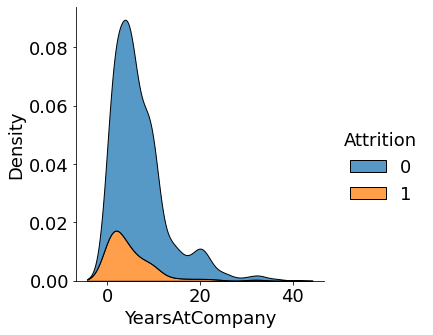

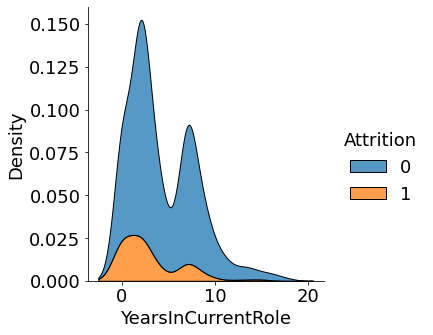

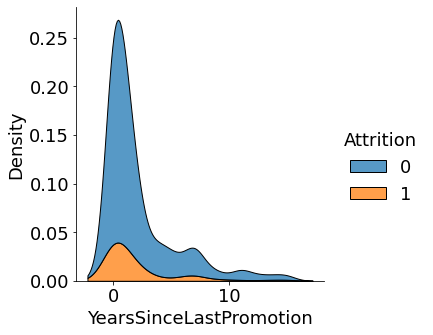

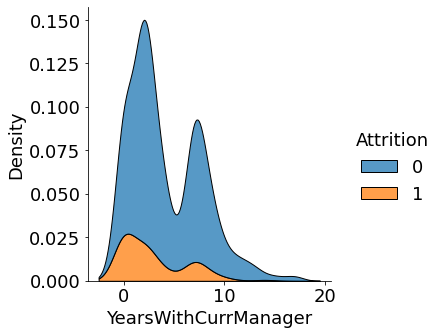

In [42]:
for i, col in enumerate(numerical_df.drop(columns = ['EmployeeCount','StandardHours']).columns):
    if col != 'Attrition':
        plt.figure(i)
        sns.displot(data=numerical_df, x=col, hue="Attrition", multiple="stack", kind="kde")
    else:
        pass

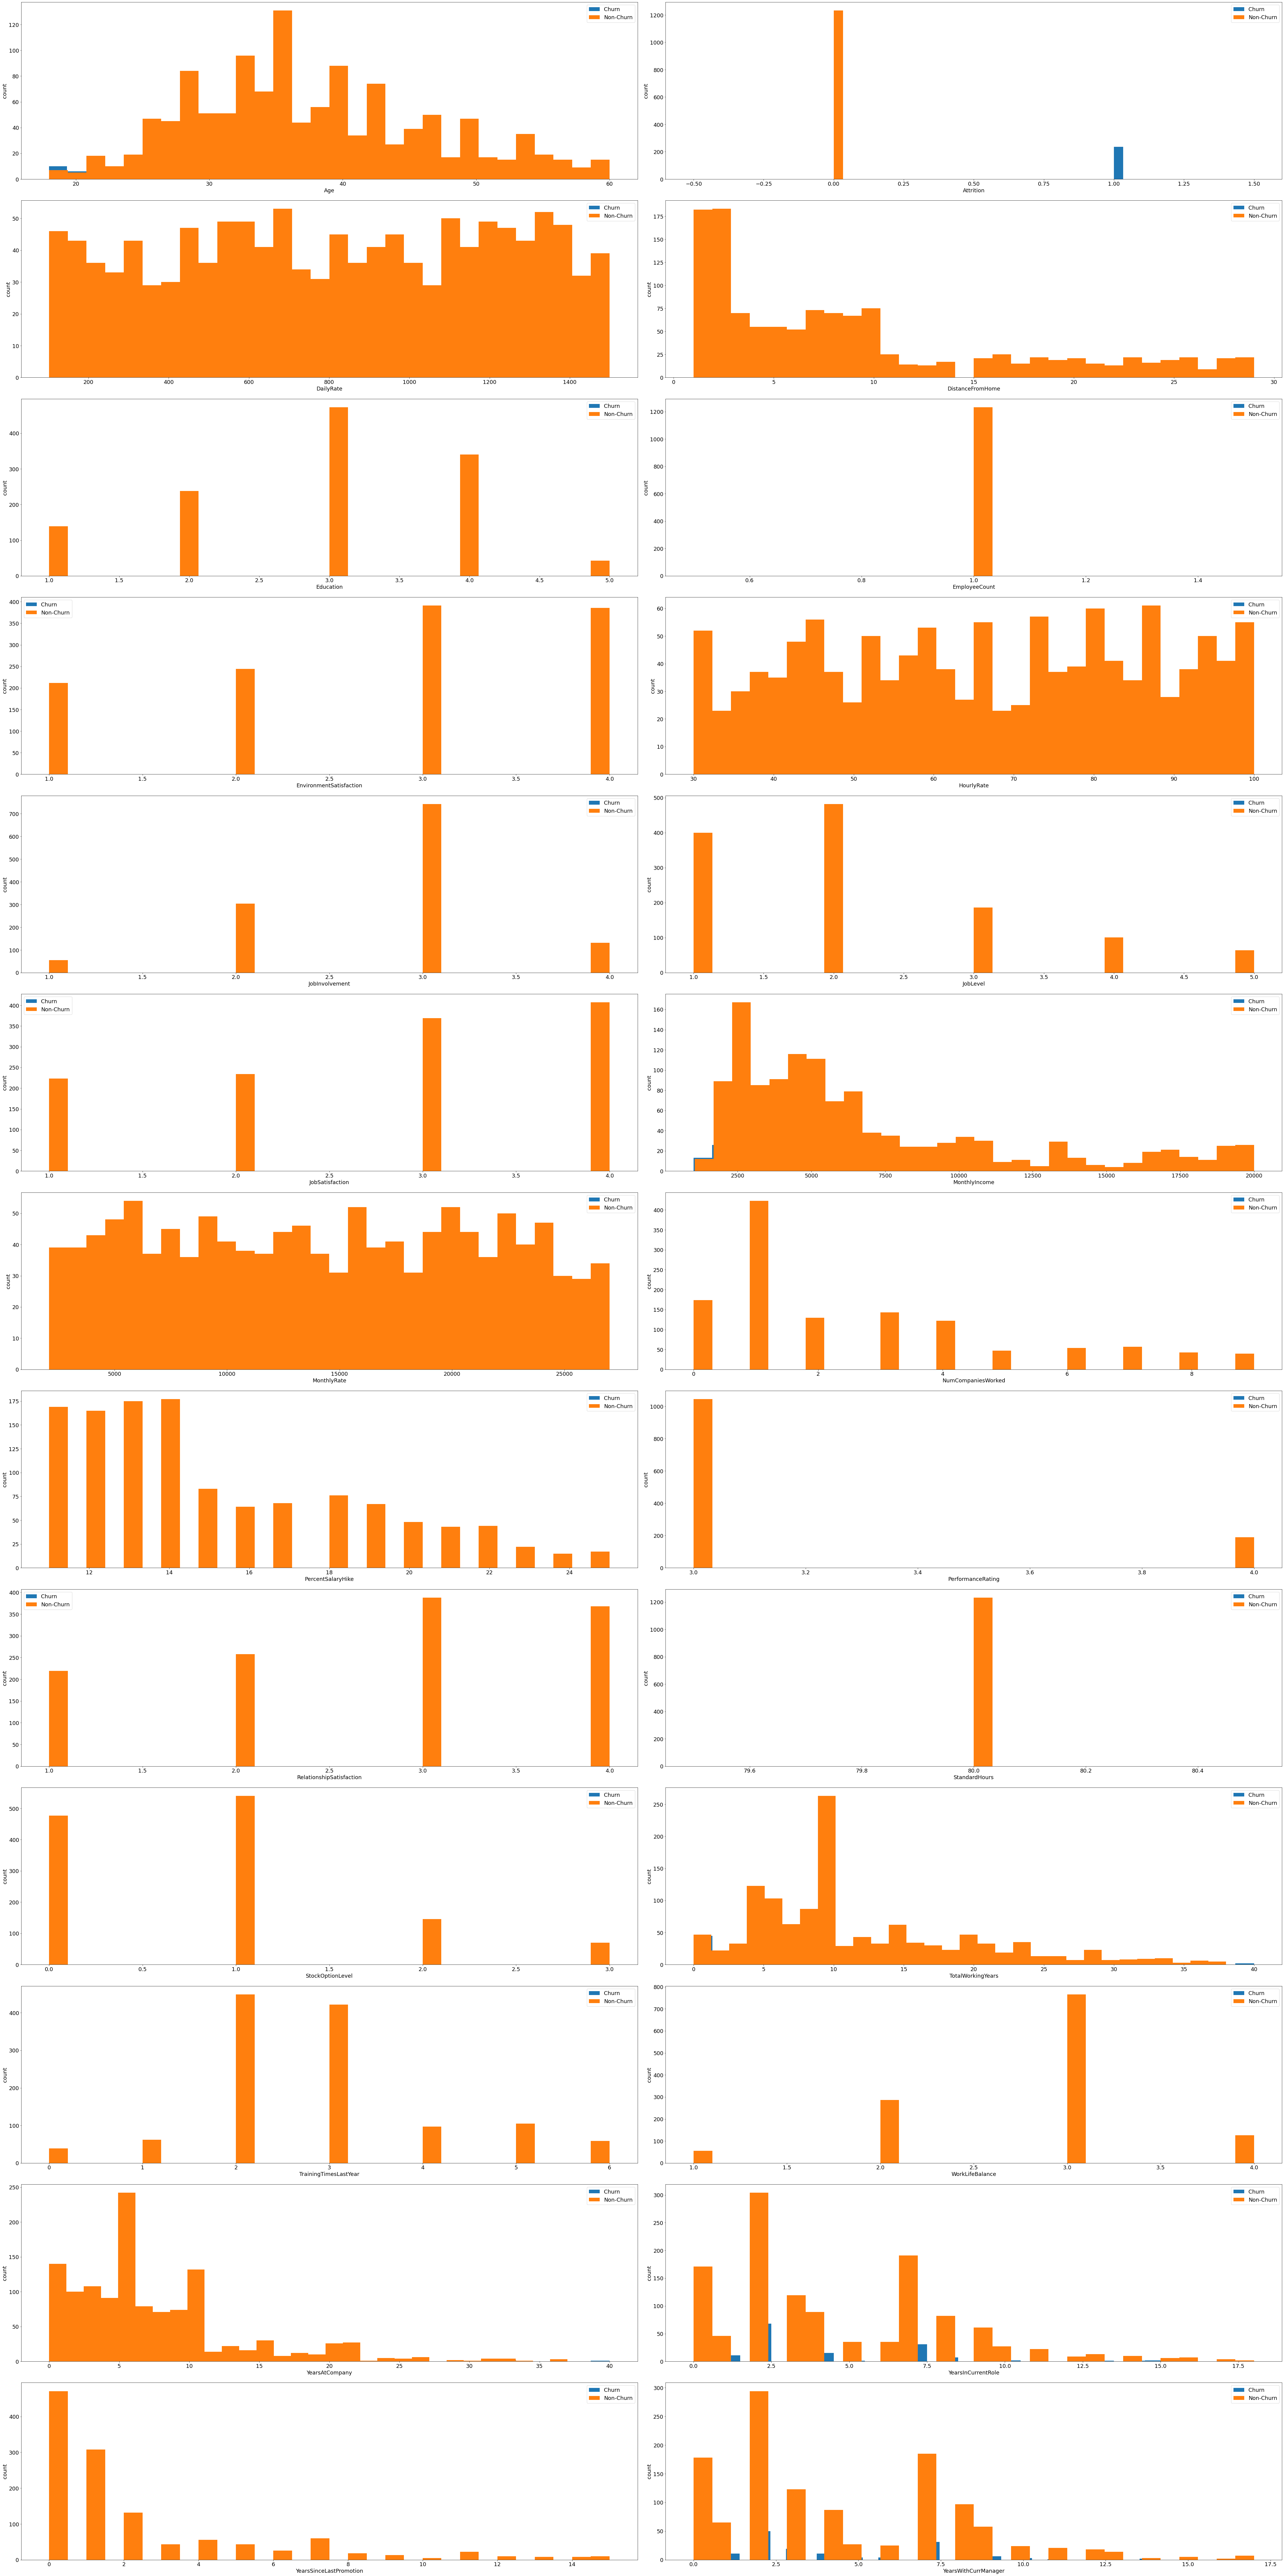

In [43]:
fig , ax = plt.subplots(13,2, figsize=(60,120))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = numerical_val[numerical_var_count]

        ax[i, j].hist(numerical_df[numerical_df[target[0]]==1][x],label='Churn',bins=30)
        ax[i, j].hist(numerical_df[numerical_df[target[0]]==0][x],label='Non-Churn',bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].legend()
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

2. Numerical Boxplot
- Bivariate Analysis 
- To explore the numerical variable outliers and the relationships of the attributes.
- It can be observed that there are outliers in Age, JobLevel, NumberCompaniesWorked, PercentSalaryHike, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

**Observation:**
- **Churners are younger.** Younger generation tends to be more frequent in job-hopping compared to older generation as there are more working opportunities in the industry nowadays. 
- **Churners tend to stay far away from company.** The individual might not think of to find a place which nearner to company, in order to reduce commute and less traffic.
- **Churners tend to work for more companies.** This may reflect that the individual has a more challenging attitude as they want to explore different opportunities with different company.
- **Churners tend to have a low job level with low monthly income.** They are more likely **not satisfied to the job** but shorter working hours. Hence, they have a **shorter tenure in company, with manager and current role.** 

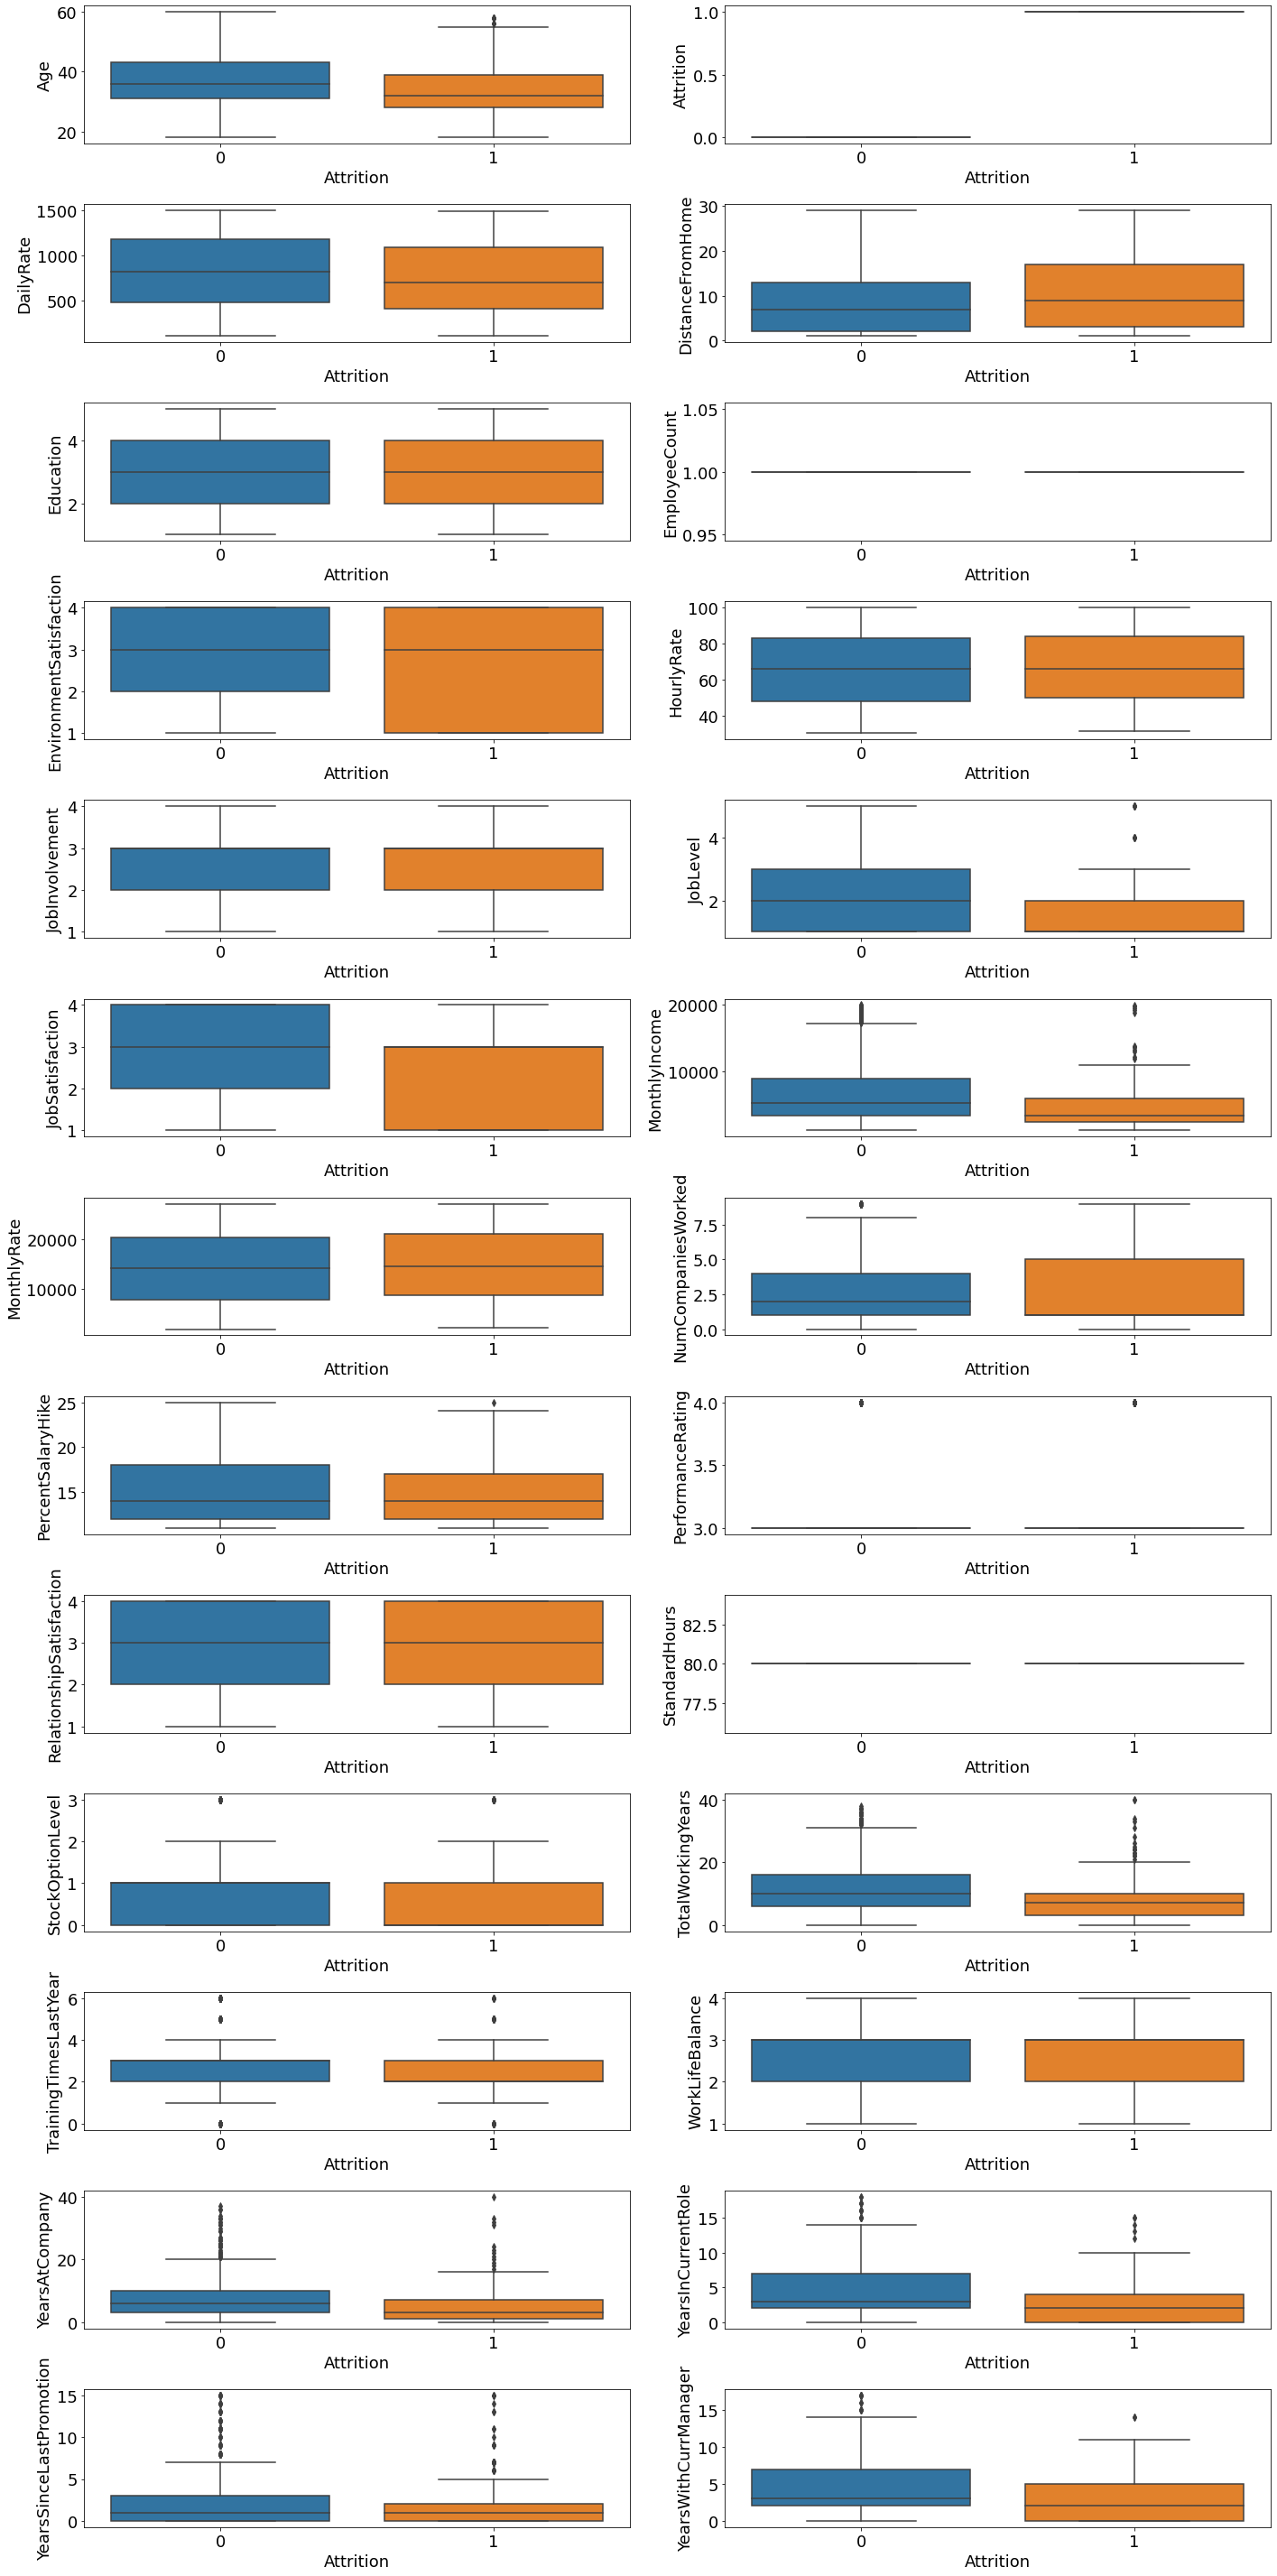

In [44]:
fig , ax = plt.subplots(13,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df['Attrition'], y=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel='Attrition', ylabel=k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

3. Categorical Barplot 
- Univariate analysis
- To explore the categorical variable distribution. 

**Observation:**
- Majority of the employee rarely travel and no overtime. 
- Most of the employee are from researtch & development department. The employees are mostly come from life sciences, followed by other, medical then marketing, technical degree and human resource. 
- Most of the employee are male. 
- Minority of the employee are still single. 

**Observations:**

- **The employee attrition rate is lower.**
- Majority of the employee have **traveled rarely, and not having overtime.**
- Most of the employee are **male.**
- Minority of the employee are still **single.** 
- **The majority of employees work for the R&D department.** The chance of attrition there is ~15%.
- **Majority of the employees come from an educational background in the Life Sciences and Medical fields**, followed by Marketing, Technical Degree, then Other and Human Resources.
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **Employees working overtime have more than a 30% chance of attrition**, which is very high compared to the 10% chance of attrition for employees who do not work extra hours.

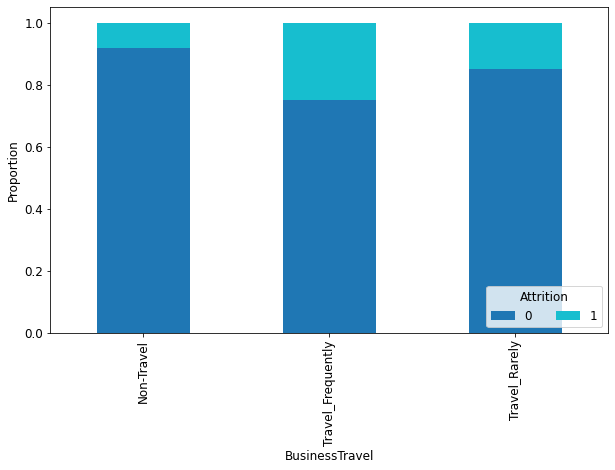

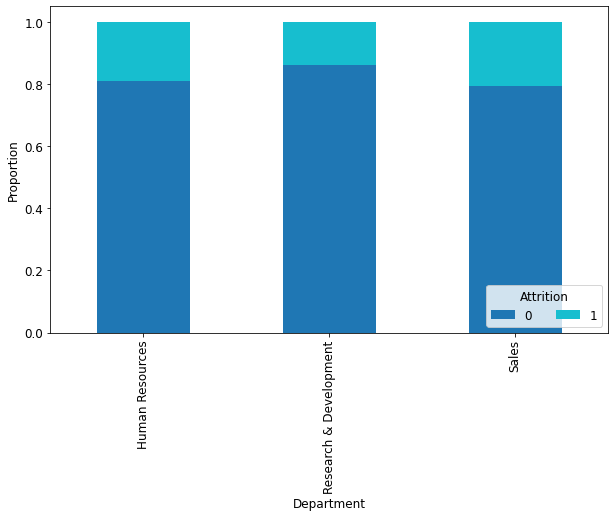

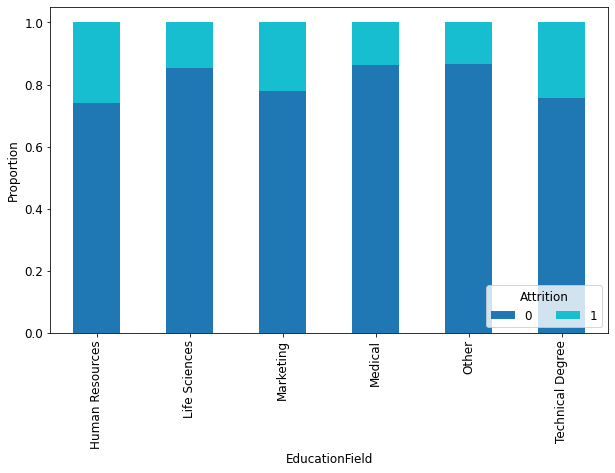

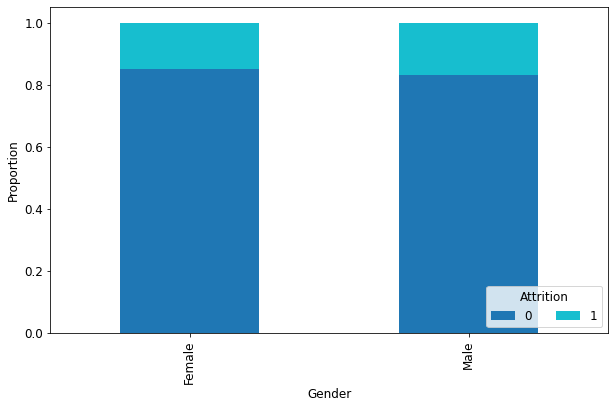

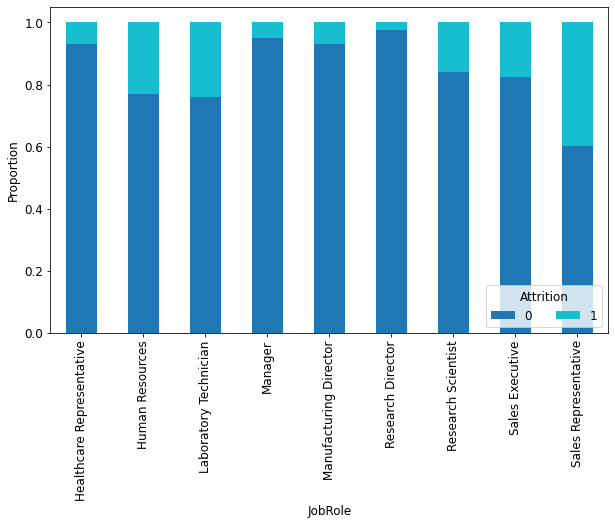

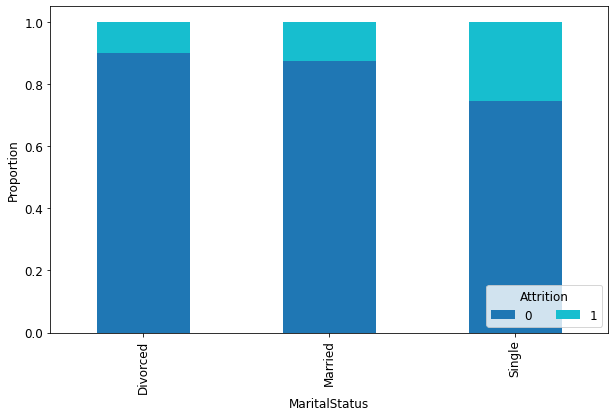

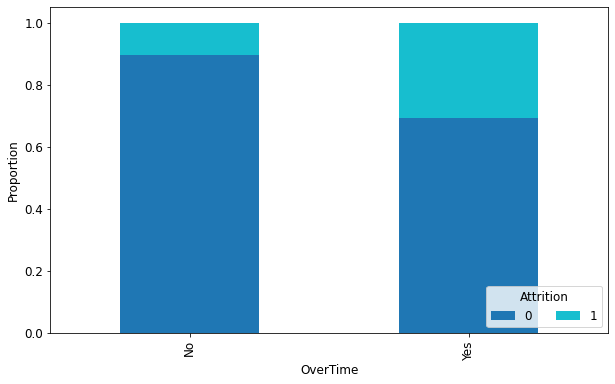

In [45]:
plt.rcParams.update({'font.size': 12})

for i, col in enumerate(categorical_df):
    if col != 'Attrition' and col != 'Over18':
        cross_tab_prop = pd.crosstab(index=categorical_df[col],
                                    columns=categorical_df['Attrition'],
                                    normalize="index")

        cross_tab_prop.plot(kind='bar', 
                            stacked=True, 
                            colormap='tab10', 
                            figsize=(10, 6))

        plt.legend(loc="lower right", ncol=2, title = 'Attrition')
        plt.xlabel(col)
        plt.ylabel("Proportion")
        plt.show()
    else:
        pass

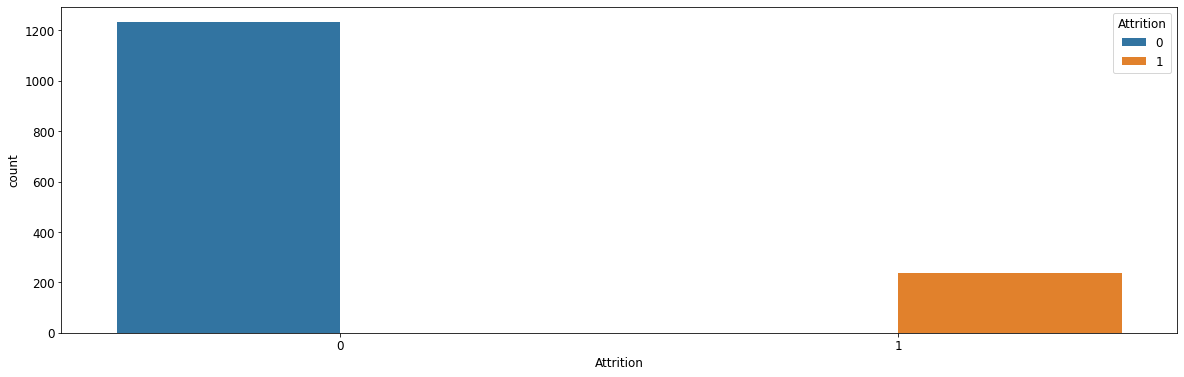

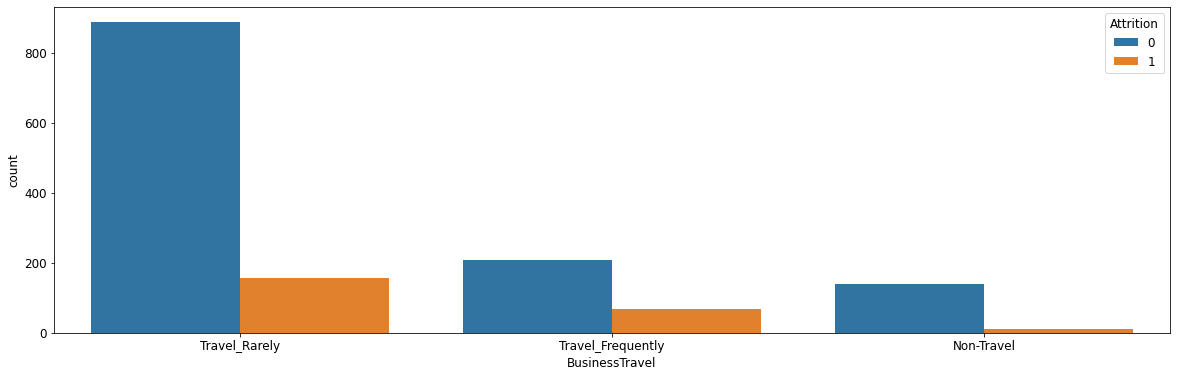

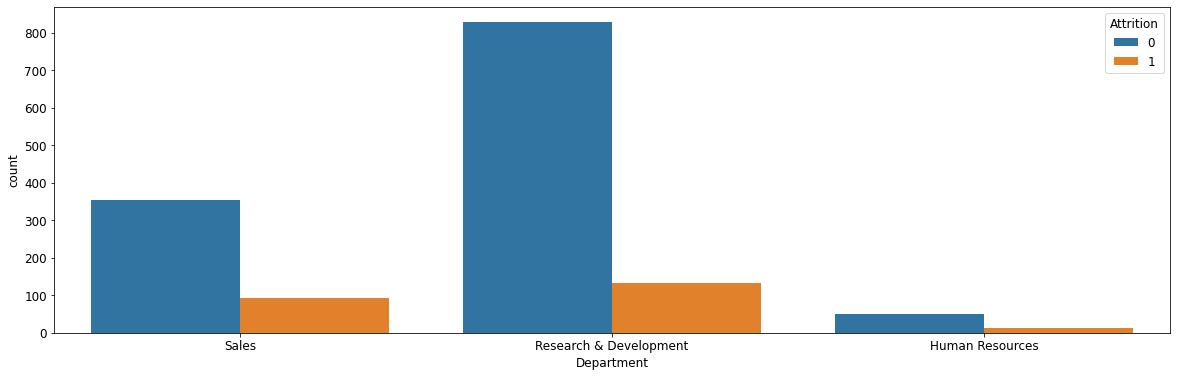

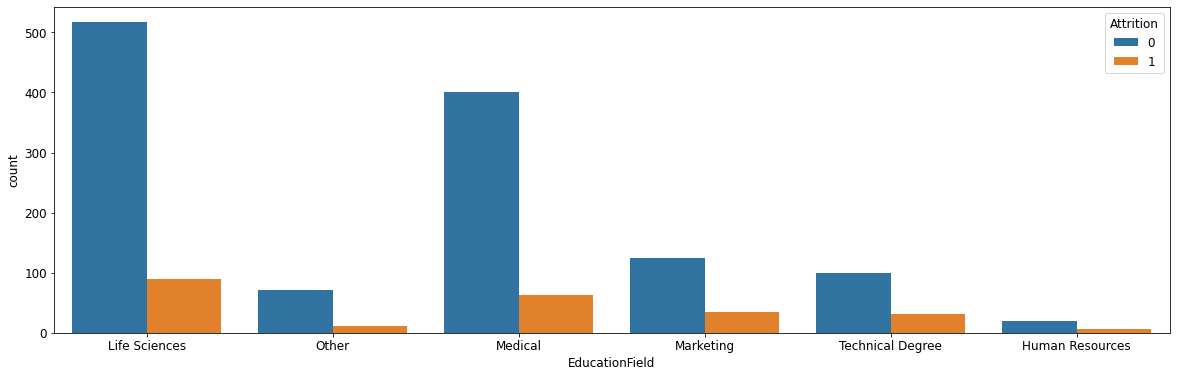

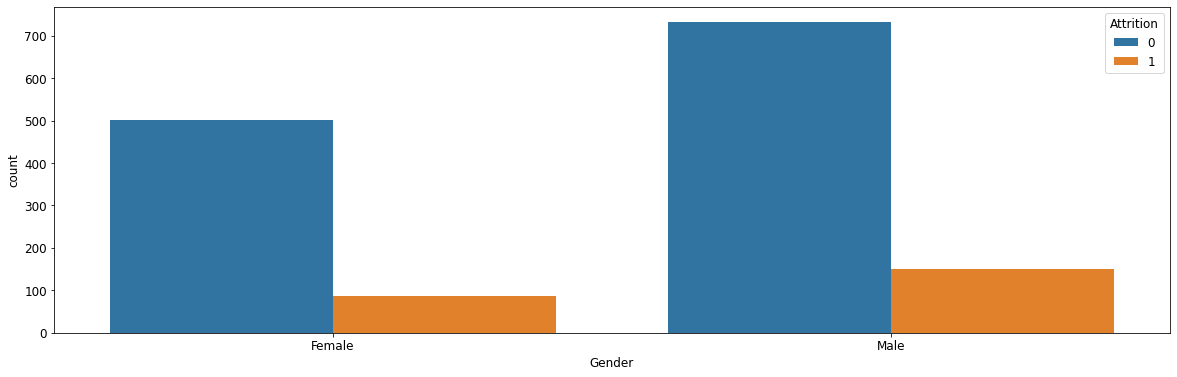

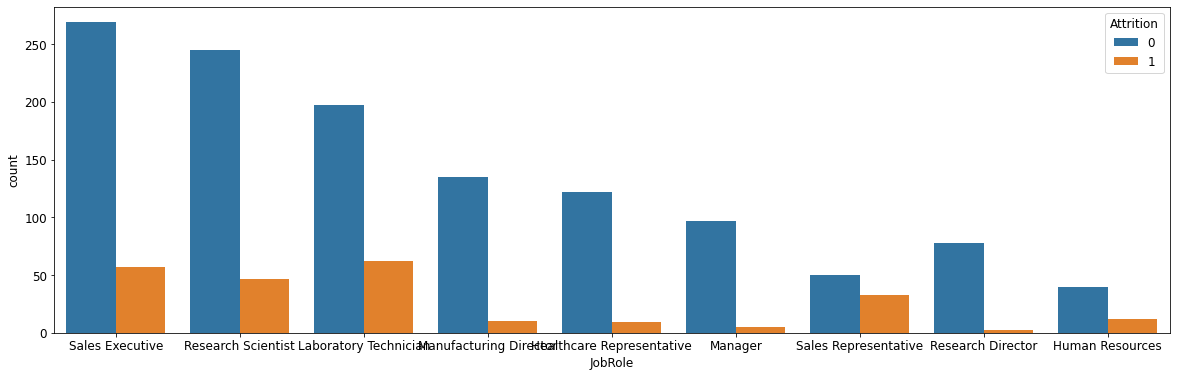

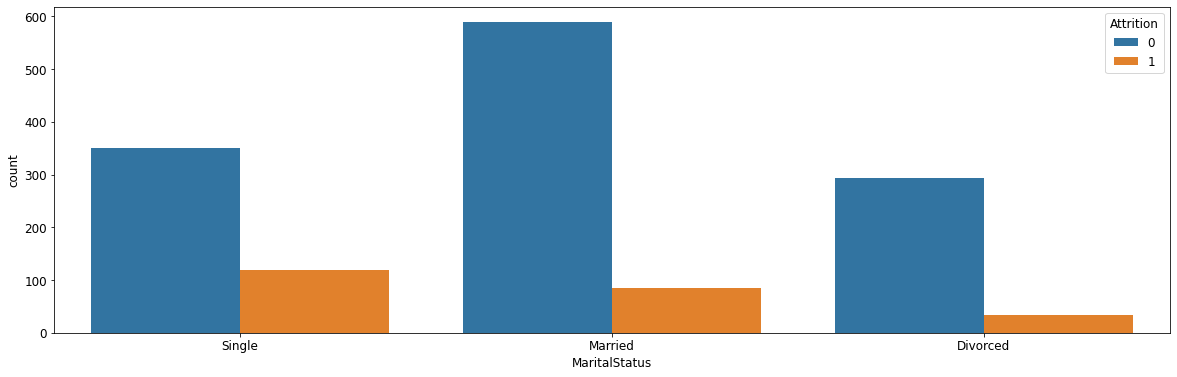

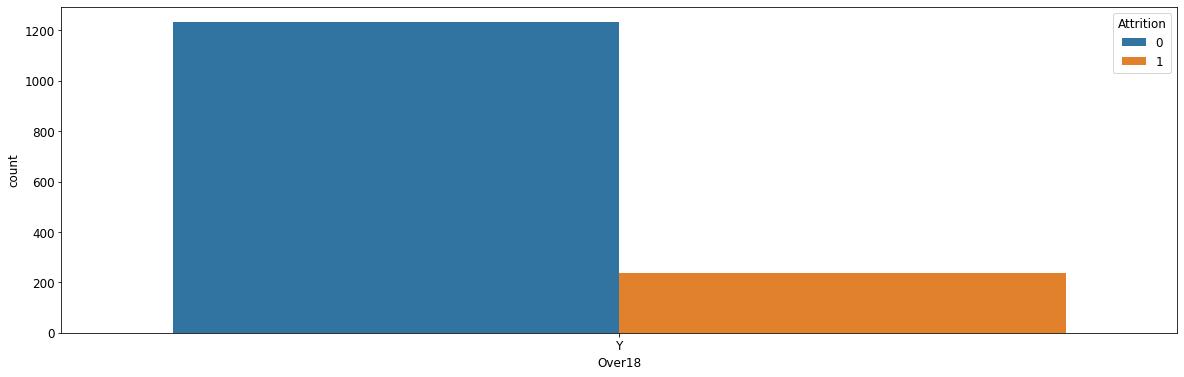

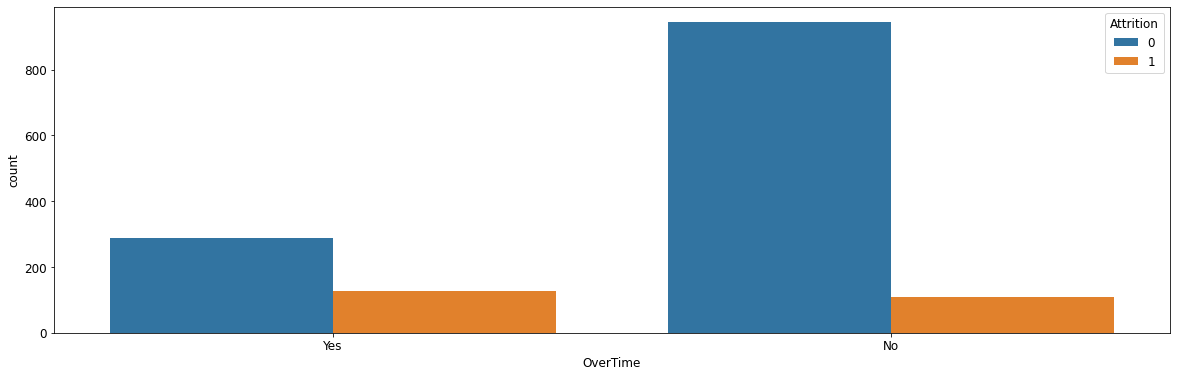

In [46]:
for i, col in enumerate(categorical_df):
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, hue="Attrition", data=categorical_df)

4. Scatterplot
- To explore multivariate analysis.

**Observation:**
- **The longer the working years in company, the higher the job level, and the higher the monthly income.**
- **Employees' performance rating affect the percentage of salary hike. It does not related with the employees' age and education.**
- The **longer the working years in company, the longer the tenure in current role and company.** It shows that the employee will have a better relationship with current manager. 
- **Overtime do affect the employee to consider resign or not regardless of age.**

In [52]:
#### <a style="color:blue;">ScatterPlot (Correlation > +-0.7)</a>
#- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.7 or -0.7. 
#g = sns.PairGrid(dataset, vars=['MonthlyIncome', 'YearsWithCurrManager', 'JobLevel','TotalWorkingYears',
#                                'PerformanceRating','PercentSalaryHike','YearsAtCompany','YearsInCurrentRole'
#                                ],hue='Attrition', palette='RdBu_r')
#g.map(plt.scatter, alpha=0.8)
#g.add_legend();

### Data Pre-processing
#### Data Cleaning

#### <a style="color:blue;">Missing value</a>
- There is **no missing value** in the dataset.

In [47]:
#Missing values in dataset
print ("\nMissing values: ", dataset.isnull().sum().values.sum())

#Missing values details
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_values = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_values.sort_values('percent_missing', ascending = False, inplace=True)
print ("\nMissing values for each variables: ", missing_values)


Missing values:  0

Missing values for each variables:                                         column_name  percent_missing
Age                                            Age              0.0
StandardHours                        StandardHours              0.0
NumCompaniesWorked              NumCompaniesWorked              0.0
Over18                                      Over18              0.0
OverTime                                  OverTime              0.0
PercentSalaryHike                PercentSalaryHike              0.0
PerformanceRating                PerformanceRating              0.0
RelationshipSatisfaction  RelationshipSatisfaction              0.0
StockOptionLevel                  StockOptionLevel              0.0
Attrition                                Attrition              0.0
TotalWorkingYears                TotalWorkingYears              0.0
TrainingTimesLastYear        TrainingTimesLastYear              0.0
WorkLifeBalance                    WorkLifeBalance         

#### <a style="color:blue;">Meaningless value</a>
- To check and drop unecessary columns: Over18, EmployeeCount, StandardHours
- These columns displayed the same value for each records.

**Definition:**

* EmployeeNumber indicates the identity of employee in the company.
* Over18 indicates the age of employee in the company must be over 18 years old. 
* EmployeeCount indicates the count of unique employee in the company. 
* StandardHours indicates the standard working hours (80 hours) of employee in the company.

In [48]:
dataset.drop(['Over18','EmployeeCount','StandardHours'],axis='columns',inplace=True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### <a style="color:blue;">Convert OverTime to numerical label - Yes indicates 1 and No indicates 0</a>

In [49]:
dataset.OverTime.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Data Integration - Correlation

#### <a style="color:blue;">Correlation Matrix Heatmap</a>
- Numerical variables only

**It can be observed that:** 
- The higher the job level, the higher the monthly income. 
- The higher the job level, the longer the total working years. 
- The longer the total working years, the higher the monthly income.
- The higher the performance rating , the higher the percent salary hike.
- The longer the years at company, the longer the years in current role. 
- The longer the years at company, the longer the years with current manager. 
- The longer the years with current manager, the longer the years in current role.  

<AxesSubplot:>

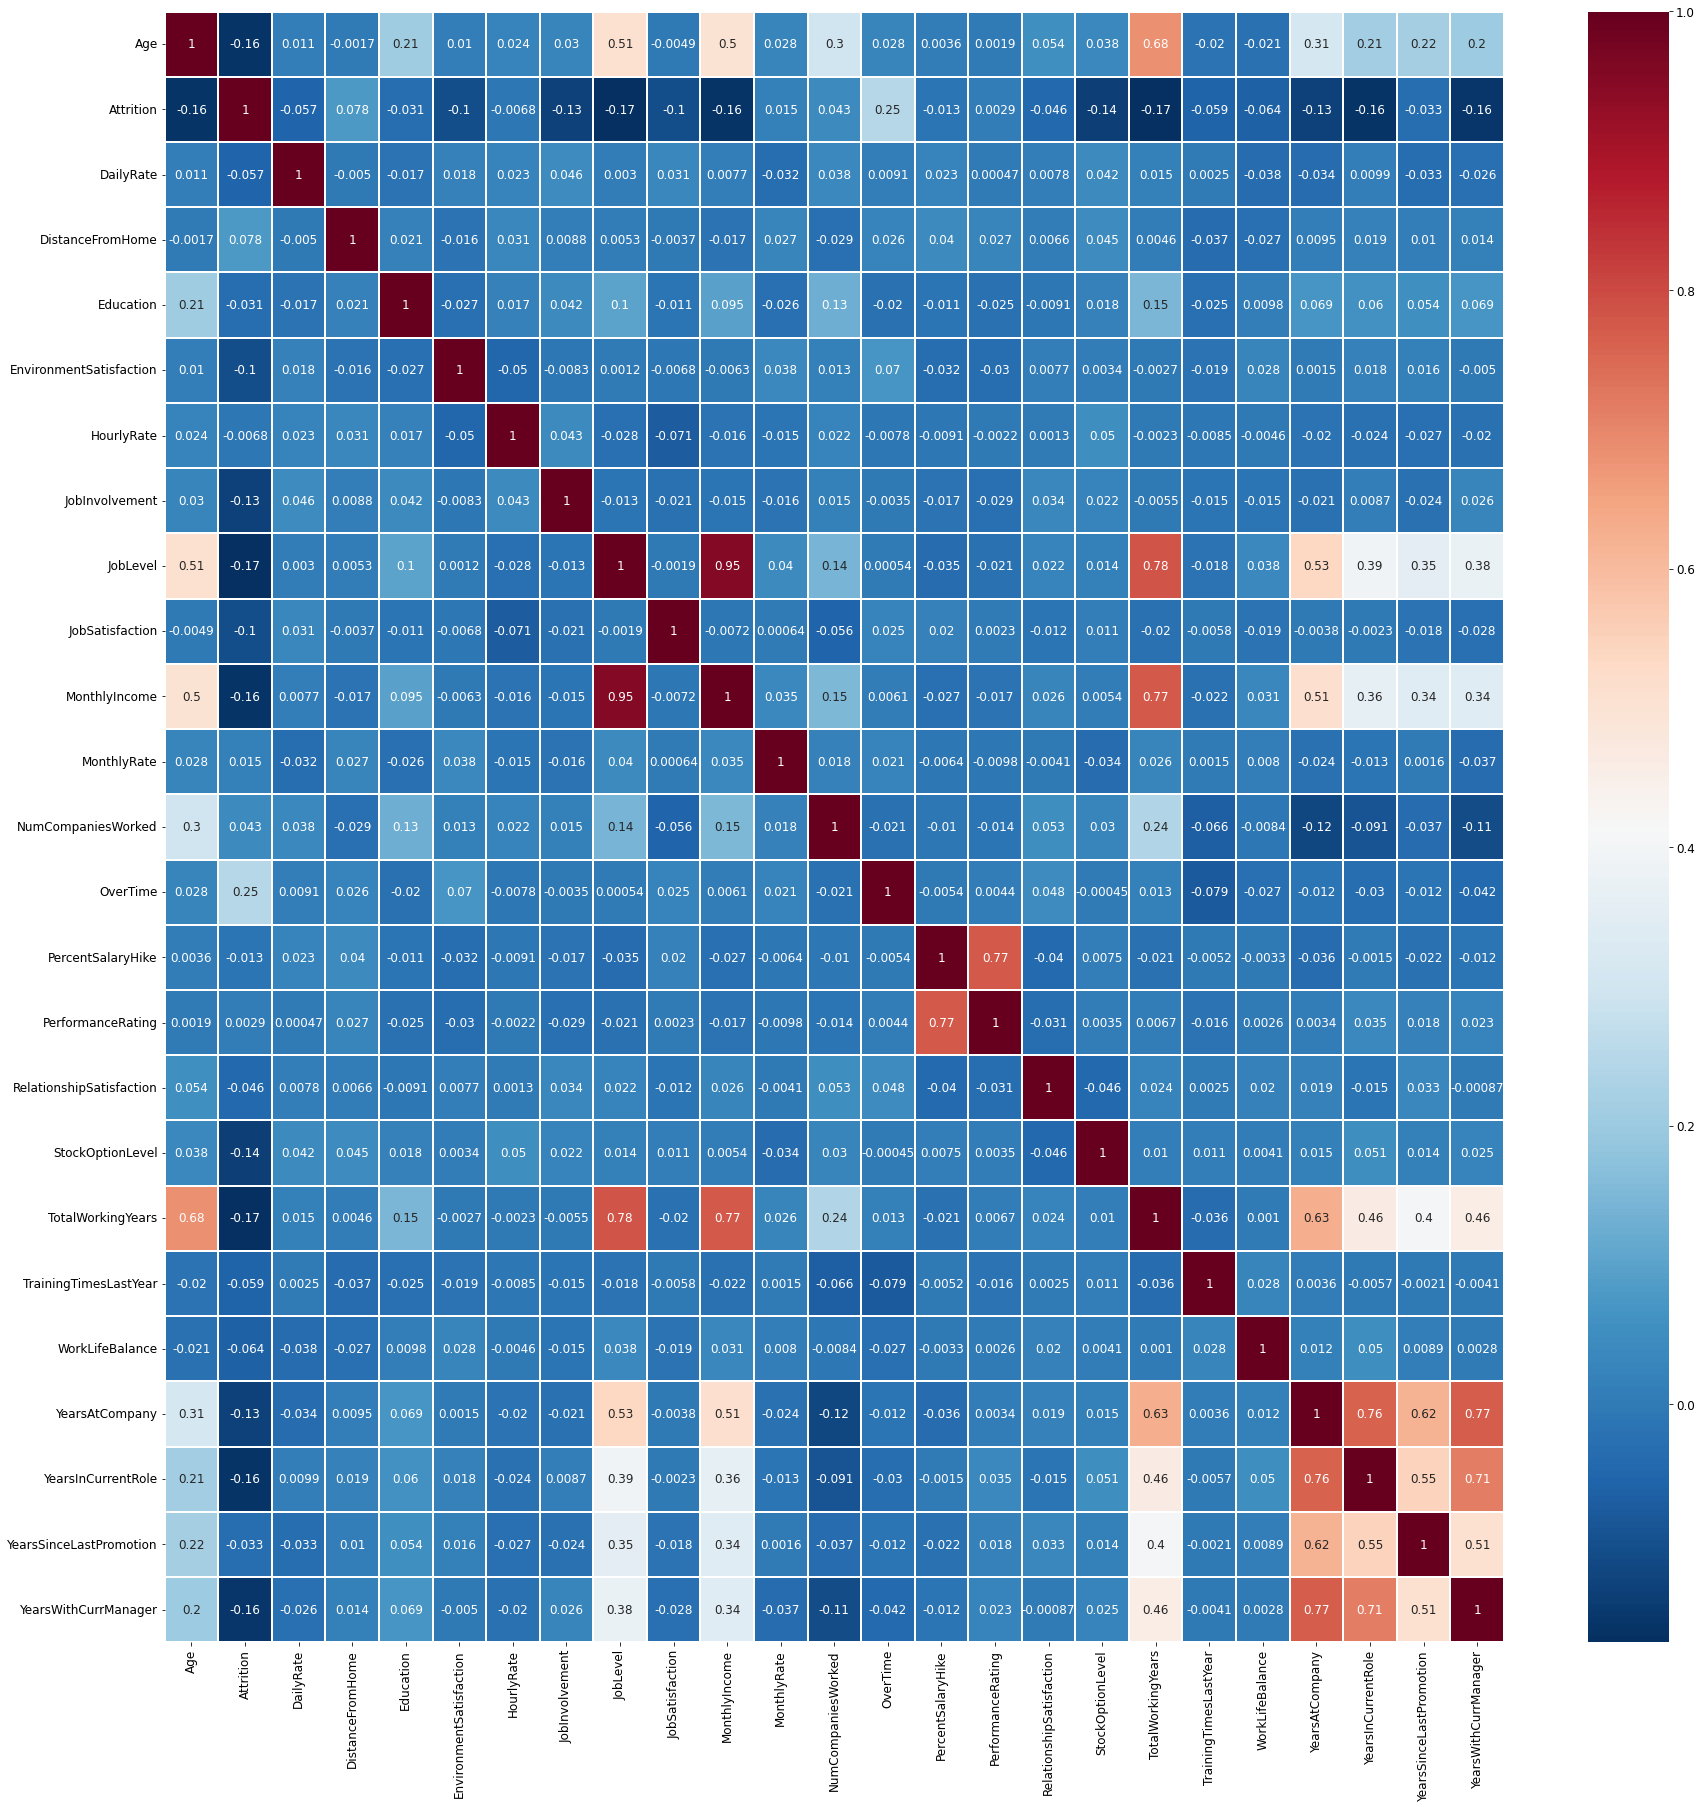

In [50]:
#Correlation Matrix 
#df_numerics_only = dataset.select_dtypes(include=np.number)
#df_numerics_only.corr()

#Correlation Matrix Heatmap
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr = pearsoncorr[((pearsoncorr >= .5) | (pearsoncorr <= -.5)) & (pearsoncorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.4)

#### <a style="color:blue;">Correlation Matrix Heatmap (Correlation > +-0.8)</a>
- To highlight the pairs of numerical variables which having correlation coefficient of more than 0.8 or -0.8. 

Correlation > 0.8: 


JobLevel         0.9503
MonthlyIncome    0.9503
dtype: float64

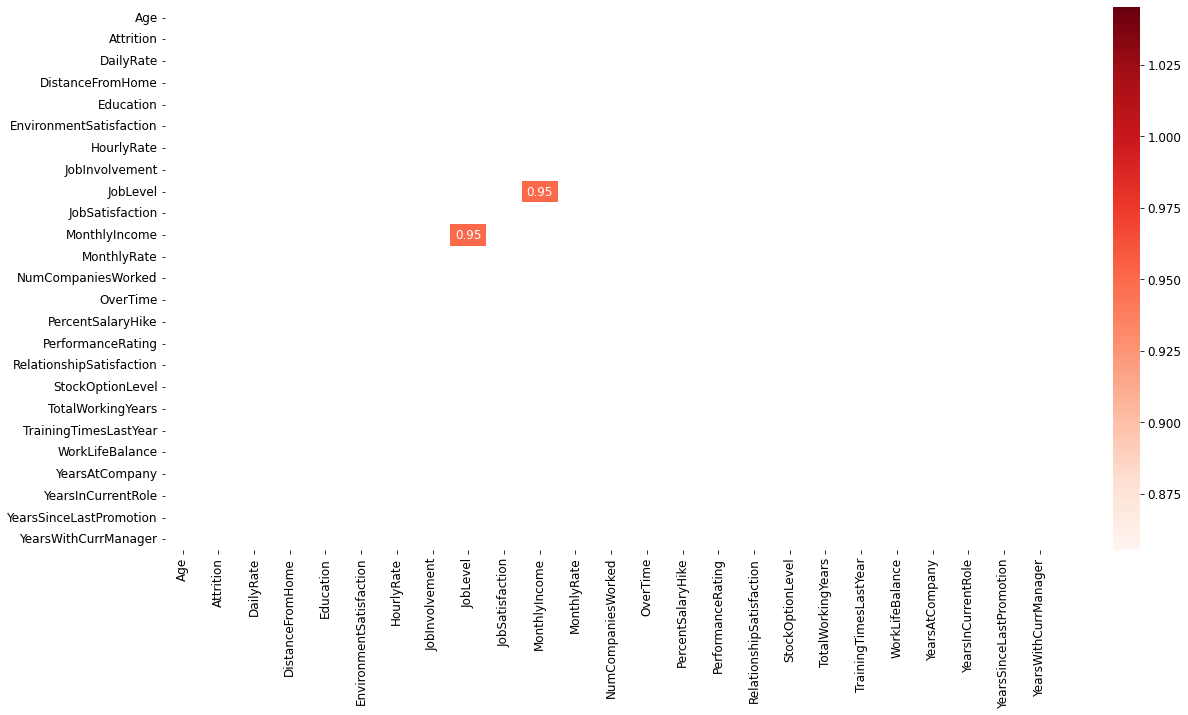

In [51]:
corr = dataset.corr().abs()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
print("Correlation > 0.8: ")
display(corr_cols[corr_cols > 0.8])

dfCorr = dataset.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.8)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

#### Data Reduction - Principle Component Analysis (PCA)
- Principal Component Analysis (PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### <a style="color:blue;">Dataset are seperated into numerical and categorical.</a>

In [53]:
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64' and i != 'Attrition']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#### <a style="color:blue;">Label encoding is applied to categorical variable.</a>
- Not using one hot encoding because the categorical are not ranked in order.

In [54]:
dataset_cat_encoded = pd.get_dummies(dataset[categorical], columns= [i for i in dataset[categorical].columns if dataset[categorical][i].dtypes=='object'],drop_first=False)

#### <a style="color:blue;">Merge numerical and categorical.</a>

In [55]:
dataset_encoded = pd.merge(dataset[numerical], dataset_cat_encoded, left_index=True, right_index=True, how="left")
dataset_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [56]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset_encoded))
dataset_scaled.columns = dataset_encoded.columns.values
dataset_scaled.index = dataset_encoded.index.values
dataset_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
2,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
5,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
7,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565


#### <a style="color:blue;"> Fit standardized data into PCA.</a>

In [57]:
pca = PCA(n_components = 25) 
pca_fit = pca.fit_transform(dataset_scaled) 

#### <a style="color:blue;">Explained Variance Ratio</a>
- The percentage of variance that is attributed by each of the selected components. Ideally, number of components to include in the model by adding the explained variance ratio of each component till around 0.8 or 80% to avoid overfitting.
- Based on the cumulative variance plot, the optimal number of components is 25. Meaning, 25 features are required to explain the model correctly. Data dimentionality could be reduced from 50 to 25. 

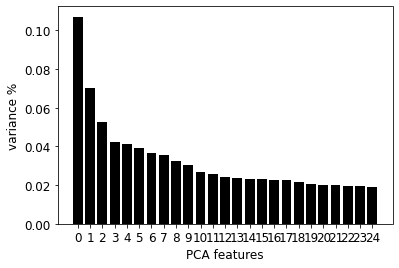

In [58]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features) 
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

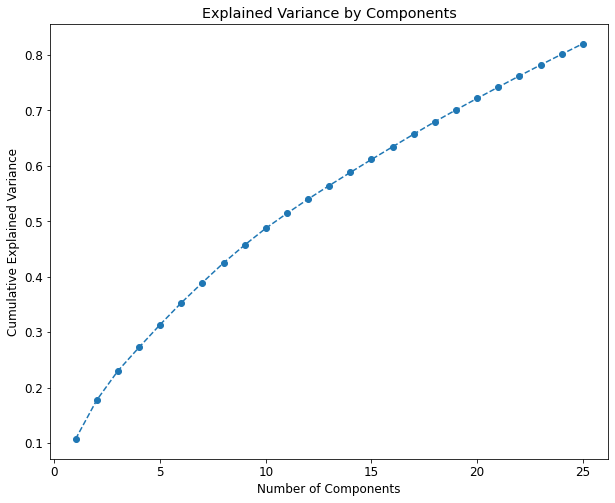

In [59]:
#Decide how many feature to keep based on the cumulative variance plot. Optimal 25 variables or variance >80%
plt.figure(figsize=(10, 8))
plt.plot(range(1,26), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance' )

#### <a style="color:blue;">Important features based on PCA</a>
- Principal component of 1st, 2nd, 5th, 6th, 7th: 
    * Weak correlation with respective original variables. 
    * These criterias do not vary together. If one increases, then the remaining ones remain unchange.

- Principal component of 3rd: Correlated with Job role and Department (HR).
- Principal component of 4th, 10th: Correlated with Marital status (single, divorced).
- Principal component of 8th: Correlated with increasing Percent salary hike and performance rating. 
- Principal component of 9th: Correlated with Education field (Medical).

In [60]:
pca = PCA(n_components = 25) 
pca.fit(dataset_scaled) 
df_pca = pca.transform(dataset_scaled)

#Get the most important features, to understand which features are important for that component 
def create_importance_dataframe(pca, Y):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)
    
    # Assign columns
    importance_df.columns = Y.columns
    
    # Change to absolute values
    # importance_df =importance_df.apply(np.abs)
    
    # Transpose
    importance_df=importance_df.transpose()
    
    # Change column names again
    ## First get number of pcs
    num_pcs = importance_df.shape[1]
    
    ## Generate the new column names
    new_columns = [i for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns = new_columns

    # Return importance df
    return importance_df
   
# Call function to create importance df
importance_df = create_importance_dataframe(pca, dataset_scaled)

# Show first few rows
display(importance_df.head())

# Top 10 for PC 1 - PC 20
for i in importance_df.columns:
    top_10_features = importance_df[i].sort_values(ascending = False)[:10]
    print(), print(f'pc{i}_top_10_featuress are \n'.format(i=i))
    display(top_10_features)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Age,0.258199,-0.065039,0.046969,0.009757,-0.156467,0.118513,0.165517,0.058428,-0.051341,-0.043476,...,0.003494,-0.092372,-0.061219,-0.040963,-0.066103,0.024022,-0.163666,0.025455,0.061255,0.085788
DailyRate,-0.002080,-0.020961,-0.012307,-0.076106,-0.071497,-0.022661,0.043503,0.007863,0.010594,-0.019141,...,-0.085918,-0.255637,0.201633,-0.460780,0.365639,0.222805,0.142426,-0.130213,-0.193381,-0.098093
DistanceFromHome,0.003015,0.010206,-0.016442,-0.057593,0.008017,-0.060764,0.006398,0.039459,0.013616,-0.021598,...,-0.174461,-0.139316,-0.022684,0.447667,0.069084,0.146053,0.300758,-0.334091,0.348635,0.163088
Education,0.070857,0.006353,0.017175,0.011412,-0.057333,0.059180,0.067678,-0.002968,-0.111286,0.043533,...,0.038028,0.114361,0.047217,-0.016299,-0.197190,-0.092662,-0.035800,-0.083314,0.113166,0.334514
EnvironmentSatisfaction,-0.000189,-0.015453,-0.009662,0.011835,-0.001894,0.012618,-0.010303,-0.054422,0.026253,0.055148,...,0.017519,-0.137596,-0.187069,-0.133318,0.124280,-0.162938,-0.199305,-0.065455,-0.283301,0.130120



pc1_top_10_featuress are 



JobLevel                     0.380489
MonthlyIncome                0.374056
TotalWorkingYears            0.373971
YearsAtCompany               0.341670
YearsInCurrentRole           0.288291
YearsWithCurrManager         0.281425
Age                          0.258199
YearsSinceLastPromotion      0.254823
JobRole_Manager              0.229763
JobRole_Research Director    0.150387
Name: 1, dtype: float64


pc2_top_10_featuress are 



Department_Sales                  0.497822
JobRole_Sales Executive           0.421935
EducationField_Marketing          0.343347
JobRole_Sales Representative      0.192210
JobRole_Human Resources           0.063330
Department_Human Resources        0.060866
EducationField_Human Resources    0.050977
WorkLifeBalance                   0.043904
MaritalStatus_Single              0.033827
Gender_Female                     0.018674
Name: 2, dtype: float64


pc3_top_10_featuress are 



Department_Human Resources        0.565624
JobRole_Human Resources           0.539146
EducationField_Human Resources    0.470859
Gender_Male                       0.108608
MaritalStatus_Married             0.094897
StockOptionLevel                  0.089693
JobRole_Manager                   0.072546
NumCompaniesWorked                0.063445
MaritalStatus_Divorced            0.060011
Age                               0.046969
Name: 3, dtype: float64


pc4_top_10_featuress are 



MaritalStatus_Single              0.519898
Gender_Female                     0.338674
Department_Human Resources        0.143597
JobRole_Human Resources           0.128402
EducationField_Human Resources    0.100501
JobRole_Manager                   0.073905
MonthlyRate                       0.071026
RelationshipSatisfaction          0.054143
MonthlyIncome                     0.051258
JobRole_Sales Representative      0.048493
Name: 4, dtype: float64


pc5_top_10_featuress are 



Gender_Male                         0.354677
BusinessTravel_Travel_Frequently    0.272835
YearsWithCurrManager                0.245831
MaritalStatus_Single                0.224847
YearsInCurrentRole                  0.223334
YearsAtCompany                      0.220283
BusinessTravel_Non-Travel           0.205208
YearsSinceLastPromotion             0.201406
PerformanceRating                   0.065016
EducationField_Life Sciences        0.064153
Name: 5, dtype: float64


pc6_top_10_featuress are 



Gender_Male                     0.452026
BusinessTravel_Travel_Rarely    0.233825
MaritalStatus_Single            0.231521
NumCompaniesWorked              0.169278
MonthlyIncome                   0.156255
JobRole_Research Director       0.141982
JobLevel                        0.136190
Age                             0.118513
TotalWorkingYears               0.088867
JobRole_Manager                 0.082925
Name: 6, dtype: float64


pc7_top_10_featuress are 



BusinessTravel_Travel_Frequently    0.397495
BusinessTravel_Non-Travel           0.265786
NumCompaniesWorked                  0.248445
MaritalStatus_Divorced              0.234869
Age                                 0.165517
MonthlyIncome                       0.137892
JobLevel                            0.137735
JobRole_Research Director           0.105274
StockOptionLevel                    0.092972
TotalWorkingYears                   0.084464
Name: 7, dtype: float64


pc8_top_10_featuress are 



PercentSalaryHike               0.657384
PerformanceRating               0.644797
Gender_Male                     0.119322
BusinessTravel_Travel_Rarely    0.115700
JobRole_Manager                 0.087536
MaritalStatus_Married           0.072616
Age                             0.058428
MonthlyIncome                   0.056747
MaritalStatus_Single            0.050471
JobLevel                        0.045016
Name: 8, dtype: float64


pc9_top_10_featuress are 



EducationField_Medical             0.634520
TrainingTimesLastYear              0.145068
MaritalStatus_Divorced             0.128889
WorkLifeBalance                    0.075394
RelationshipSatisfaction           0.065141
MaritalStatus_Single               0.056622
EducationField_Technical Degree    0.054405
EducationField_Other               0.052073
JobRole_Research Director          0.047869
EducationField_Marketing           0.047052
Name: 9, dtype: float64


pc10_top_10_featuress are 



MaritalStatus_Divorced          0.612344
BusinessTravel_Travel_Rarely    0.208000
StockOptionLevel                0.155326
EducationField_Life Sciences    0.124769
PerformanceRating               0.109735
PercentSalaryHike               0.096488
MaritalStatus_Single            0.091784
YearsWithCurrManager            0.085943
YearsInCurrentRole              0.082186
JobRole_Research Scientist      0.080654
Name: 10, dtype: float64


pc11_top_10_featuress are 



JobRole_Research Scientist         0.522235
Education                          0.295053
JobInvolvement                     0.196470
OverTime                           0.196380
EducationField_Technical Degree    0.174963
NumCompaniesWorked                 0.172675
Age                                0.140767
JobRole_Sales Executive            0.124709
RelationshipSatisfaction           0.114747
DistanceFromHome                   0.106966
Name: 11, dtype: float64


pc12_top_10_featuress are 



JobRole_Sales Representative        0.412794
EducationField_Technical Degree     0.352831
JobRole_Research Scientist          0.207589
OverTime                            0.184337
EnvironmentSatisfaction             0.174648
JobRole_Manager                     0.159590
JobSatisfaction                     0.130253
MonthlyIncome                       0.120007
BusinessTravel_Travel_Frequently    0.098791
JobLevel                            0.087547
Name: 12, dtype: float64


pc13_top_10_featuress are 



EducationField_Other                 0.528953
EnvironmentSatisfaction              0.424686
JobRole_Manufacturing Director       0.245624
EducationField_Technical Degree      0.233993
JobRole_Healthcare Representative    0.163787
BusinessTravel_Non-Travel            0.144035
WorkLifeBalance                      0.141624
JobRole_Laboratory Technician        0.108990
Education                            0.107116
NumCompaniesWorked                   0.079868
Name: 13, dtype: float64


pc14_top_10_featuress are 



BusinessTravel_Non-Travel            0.562519
EducationField_Technical Degree      0.420684
HourlyRate                           0.163727
JobRole_Healthcare Representative    0.138701
JobRole_Manager                      0.133651
DailyRate                            0.133466
TrainingTimesLastYear                0.118237
NumCompaniesWorked                   0.081318
JobRole_Sales Representative         0.076268
MonthlyRate                          0.042073
Name: 14, dtype: float64


pc15_top_10_featuress are 



BusinessTravel_Non-Travel       0.346835
OverTime                        0.275938
MonthlyRate                     0.253803
JobSatisfaction                 0.245126
EnvironmentSatisfaction         0.193825
JobRole_Manager                 0.186851
EducationField_Medical          0.169022
DistanceFromHome                0.126415
EducationField_Life Sciences    0.092053
JobRole_Research Scientist      0.088246
Name: 15, dtype: float64


pc16_top_10_featuress are 



JobRole_Manager                  0.449856
EducationField_Other             0.377636
JobRole_Laboratory Technician    0.276321
JobRole_Research Scientist       0.218733
OverTime                         0.078342
TrainingTimesLastYear            0.071320
Gender_Female                    0.065676
MaritalStatus_Divorced           0.063972
EducationField_Marketing         0.052126
MonthlyIncome                    0.046857
Name: 16, dtype: float64


pc17_top_10_featuress are 



JobRole_Research Director         0.416265
WorkLifeBalance                   0.244874
JobRole_Research Scientist        0.237284
BusinessTravel_Non-Travel         0.215318
JobRole_Manufacturing Director    0.148796
Education                         0.114361
EducationField_Other              0.079825
JobRole_Sales Executive           0.079248
MaritalStatus_Married             0.074103
MonthlyIncome                     0.063319
Name: 17, dtype: float64


pc18_top_10_featuress are 



JobRole_Healthcare Representative    0.459076
JobSatisfaction                      0.407008
JobRole_Research Director            0.287879
DailyRate                            0.201633
EducationField_Other                 0.158334
BusinessTravel_Non-Travel            0.070246
JobRole_Sales Executive              0.070005
JobRole_Human Resources              0.060627
Gender_Female                        0.053992
Education                            0.047217
Name: 18, dtype: float64


pc19_top_10_featuress are 



DistanceFromHome                     0.447667
MonthlyRate                          0.367811
JobRole_Research Director            0.196357
HourlyRate                           0.181198
JobRole_Healthcare Representative    0.166657
OverTime                             0.149927
EducationField_Marketing             0.113013
EducationField_Technical Degree      0.102067
JobRole_Sales Representative         0.092967
JobRole_Laboratory Technician        0.051927
Name: 19, dtype: float64


pc20_top_10_featuress are 



JobRole_Research Director          0.396025
DailyRate                          0.365639
RelationshipSatisfaction           0.361338
OverTime                           0.300112
WorkLifeBalance                    0.230263
JobInvolvement                     0.228557
JobRole_Laboratory Technician      0.205531
BusinessTravel_Non-Travel          0.125932
EnvironmentSatisfaction            0.124280
EducationField_Technical Degree    0.107364
Name: 20, dtype: float64


pc21_top_10_featuress are 



EducationField_Technical Degree     0.395501
JobRole_Laboratory Technician       0.251915
DailyRate                           0.222805
JobSatisfaction                     0.169748
DistanceFromHome                    0.146053
BusinessTravel_Travel_Frequently    0.092743
JobRole_Manufacturing Director      0.084019
JobRole_Research Director           0.082928
OverTime                            0.058060
EducationField_Human Resources      0.046221
Name: 21, dtype: float64


pc22_top_10_featuress are 



EducationField_Other              0.337543
HourlyRate                        0.323562
DistanceFromHome                  0.300758
JobRole_Manufacturing Director    0.217142
JobInvolvement                    0.209147
BusinessTravel_Non-Travel         0.202785
DailyRate                         0.142426
JobRole_Manager                   0.118989
JobRole_Sales Representative      0.107901
MonthlyIncome                     0.104557
Name: 22, dtype: float64


pc23_top_10_featuress are 



OverTime                             0.211316
JobRole_Sales Representative         0.162198
RelationshipSatisfaction             0.151301
NumCompaniesWorked                   0.149433
YearsSinceLastPromotion              0.085666
JobRole_Healthcare Representative    0.081040
EducationField_Marketing             0.059212
BusinessTravel_Non-Travel            0.055931
EducationField_Medical               0.049999
EducationField_Life Sciences         0.039646
Name: 23, dtype: float64


pc24_top_10_featuress are 



RelationshipSatisfaction           0.579708
JobSatisfaction                    0.412463
DistanceFromHome                   0.348635
TrainingTimesLastYear              0.232224
WorkLifeBalance                    0.177079
EducationField_Technical Degree    0.172706
Education                          0.113166
OverTime                           0.077510
JobRole_Manufacturing Director     0.067528
StockOptionLevel                   0.065460
Name: 24, dtype: float64


pc25_top_10_featuress are 



JobRole_Sales Representative     0.496696
Education                        0.334514
JobInvolvement                   0.333638
DistanceFromHome                 0.163088
EnvironmentSatisfaction          0.130120
NumCompaniesWorked               0.114725
JobRole_Laboratory Technician    0.114625
BusinessTravel_Non-Travel        0.109355
YearsSinceLastPromotion          0.092543
Age                              0.085788
Name: 25, dtype: float64

**Observation:**

- Identified outliers are not removed because the records are not an error data but  a fact.
- Job level is removed based on correlation results (+0.95). 
- PCA results will be used in model building, then compare between models with PCA and models without PCA. 

---

### Modelling

#### Train Test Split

#### <a style="color:blue;">Prepare independent and dependant variables</a>

In [61]:
#Seperate the data into target column 
Y = dataset['Attrition']

#Seperate the data into Numerical and Categorical Data
numerical = [i for i in dataset.columns if dataset[i].dtypes == 'int64']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object']

#Numerical and Categorical data in dataframe
Xnumerical = dataset[numerical]
Xnumerical = Xnumerical.drop(columns=['Attrition'])

categorical= dataset[categorical] 

#### <a style="color:blue;">Drop Job Level</a>

In [62]:
numerical = dataset.drop(columns = 'JobLevel')

#### <a style="color:blue;">One Hot Encoding</a>

In [63]:
Xcategorical = pd.get_dummies(categorical, columns= [i for i in categorical.columns if categorical[i].dtypes=='object'],drop_first=False)
X = pd.merge(Xnumerical, Xcategorical, left_index=True, right_index=True, how="left")
X.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,0,1,0


#### <a style="color:blue;">Split into train set (70%) and test set (30%) </a>

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Check class distribution 
train = len(y_train[y_train==0])
test = len(y_test[y_test==0])
print('>Train: 0=%d, Test: 0=%d' %(train, test))

>Train: 0=855, Test: 0=378


#### <a style="color:blue;">Feature Scaling - Standardization</a>

In [65]:
# Feature Scaling 
# Standardization 

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#### Model Building

We will be building 4 different models:
- **Logistic Regression**
- **Random Forest**
- **Decision Tree**

#### <a style="color:blue;">Logistic Regression</a>
A process of modeling the probability of a discrete outcome given an input variable.

In [66]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

# Predict_proba will give the probability value of y being 0 or 1.
lr_train_prob = lr.predict_proba(X_train)
lr_test_prob = lr.predict_proba(X_test)

# Predict will give output like 0,1.
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#### <a style="color:blue;">Random Forest</a>
A classification algorithm consisting of many decisions trees.

In [67]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)

#Parameters
rf_train_pred= rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_train_prob= rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

#### <a style="color:blue;">Decision Tree</a>
A tree-like model that acts as a decision support tool, visually displaying decisions and their potential outcomes.

In [68]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

#Parameters
dt_train_pred= dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_train_prob= dt.predict_proba(X_train)
dt_test_prob = dt.predict_proba(X_test)

#### Model Building (With PCA)

#### <a style="color:blue;">Select PCA components and transform</a>

In [69]:
pca_model = PCA(0.8) 
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

#### <a style="color:blue;">Fits PCA into the model</a>

Logistic Regression

In [70]:
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(pca_train,y_train)

#Parameters
lr_pca_train_prob = lr_pca.predict_proba(pca_train)
lr_pca_test_prob = lr_pca.predict_proba(pca_test)
lr_pca_train_pred = lr_pca.predict(pca_train)
lr_pca_test_pred = lr_pca.predict(pca_test)

Random Forest

In [71]:
rf_pca = RandomForestClassifier(random_state = 42)
rf_pca.fit(pca_train,y_train)

#Parameters
rf_pca_train_pred= rf_pca.predict(pca_train)
rf_pca_test_pred = rf_pca.predict(pca_test)
rf_pca_train_prob= rf_pca.predict_proba(pca_train)
rf_pca_test_prob = rf_pca.predict_proba(pca_test)

Decision Tree

In [72]:
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(pca_train,y_train)

#Parameters
dt_pca_train_pred= dt_pca.predict(pca_train)
dt_pca_test_pred = dt_pca.predict(pca_test)
dt_pca_train_prob= dt_pca.predict_proba(pca_train)
dt_pca_test_prob = dt_pca.predict_proba(pca_test)

#### <a style="color:blue;">Evaluate the model with PCA</a>

Logistic Regression

In [73]:
model_roc_auc = roc_auc_score(y_test, lr_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_pca_train_prob[:,1])

Area under curve (test):  0.7230620643319057 

Area under curve (train):  0.8444041137326074 



Random Forest

In [74]:
model_roc_auc = roc_auc_score(y_test, rf_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, rf_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, rf_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, rf_pca_train_prob[:,1])

Area under curve (test):  0.7020870076425632 

Area under curve (train):  1.0 



Decision Tree

In [75]:
model_roc_auc = roc_auc_score(y_test, dt_pca_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, dt_pca_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, dt_pca_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, dt_pca_train_prob[:,1])

Area under curve (test):  0.5886243386243386 

Area under curve (train):  1.0 



**Observation**:
The performance of Train score and Test score for logistic regression, random forest and decision tree with PCA is slighly weaker than the models without PCA. Thus, the study will continue by using the models without PCA. It shows that data reduction does not function well in this dataset.

#### Model Evaluation

#### <a style="color:blue;">Logistic Regression</a>

AUC score

In [76]:
model_roc_auc = roc_auc_score(y_test, lr_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test, lr_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train, lr_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train, lr_train_prob[:,1])

Area under curve (test):  0.7631225329638028 

Area under curve (train):  0.89628957451099 



Confusion Matrix and Evaluation Metrics

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.877551   0.609756  0.396825  0.480769  0.426621


Text(88.68, 0.5, 'predicted label')

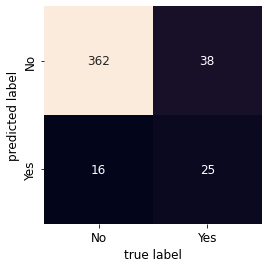

In [77]:
# Confusion Matrix 
# Imbalance dataset 

# Fitting Logistic Regression to the Training set
# Evaluate results

acc = accuracy_score(y_test, lr_test_pred )
prec = precision_score(y_test, lr_test_pred )
rec = recall_score(y_test, lr_test_pred )
f1 = f1_score(y_test, lr_test_pred )
f2 = fbeta_score(y_test, lr_test_pred, beta=2.0)


results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)


# Confusion Matrix Figure (0.5)
mat = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'])


plt.xlabel('true label')
plt.ylabel('predicted label')

Cross Validation

The average accuracy remains very close to the Logistic Regression model accuracy. The model generalizes well.

In [78]:
kfold = model_selection.KFold(n_splits=10)
modelCV =  LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.875


#### <a style="color:blue;">Random Forest</a>

AUC score 

In [79]:
model_roc_auc = roc_auc_score(y_test,rf_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,rf_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,rf_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,rf_train_prob[:,1])

Area under curve (test):  0.7238389182833627 

Area under curve (train):  1.0 



Confusion Matrix and Evaluation Metrics

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.870748     0.6875  0.174603  0.278481  0.205224


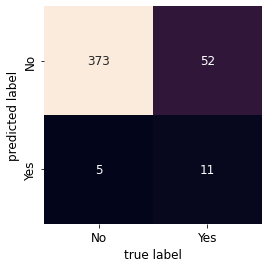

In [80]:
# Confusion Matrix
mat = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, rf_test_pred )
prec = precision_score(y_test, rf_test_pred )
rec = recall_score(y_test, rf_test_pred )
f1 = f1_score(y_test, rf_test_pred )
f2 = fbeta_score(y_test, rf_test_pred, beta=2.0)


results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy remains close to the Random Forest model accuracy. The model generalizes well.

In [81]:
kfold = model_selection.KFold(n_splits=10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.843


#### <a style="color:blue;">Decision Tree</a>

AUC score

In [82]:
model_roc_auc = roc_auc_score(y_test,dt_test_prob[:,1]) 
print ("Area under curve (test): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,dt_test_prob[:,1])

model_roc_auc = roc_auc_score(y_train,dt_train_prob[:,1]) 
print ("Area under curve (train): ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_train,dt_train_prob[:,1])

Area under curve (test):  0.5357142857142858 

Area under curve (train):  1.0 



           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Decision Tree  0.793651       0.22  0.174603   0.19469  0.182119


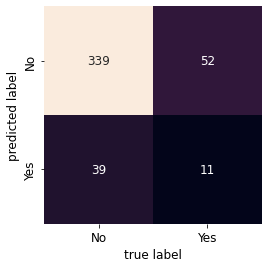

In [83]:
# Confusion Matrix
mat = confusion_matrix(y_test, dt_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('D:/RF Confusion Matrix.png')

# Evaluate results
acc = accuracy_score(y_test, dt_test_pred )
prec = precision_score(y_test, dt_test_pred )
rec = recall_score(y_test, dt_test_pred )
f1 = f1_score(y_test, dt_test_pred )
f2 = fbeta_score(y_test, dt_test_pred, beta=2.0)


results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], 
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

Cross Validation
- The average accuracy does not close to the Decision Tree accuracy. The model does not generalizes well.

In [84]:
kfold = model_selection.KFold(n_splits=10)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.792


**Observation:**

- Based on the **AUC score**, it can observed that Logistic regression has a good score (>0.8) and the difference between train and test score is small compared to the other models. 
- Based on the **accuracy score**, it can observed that both Logistic regression and Random forest has a high accuracy score, which is 0.87.
- Based on the **recall and precision score**, Logistic regression has a better score compare to the other models, which are 0.40 and 0.61 respectively.
- A higher **recall** indicates that the model will **predict the employees who have a high chance of leaving the company more correctly**, and hence this model could help to reduce the attrition rate.
- A lower **precision** indicates that the model will have lower chance to **predict that a person is going to leave even though he/she would not**, and the company would waste their time and energy on these employees who are not at risk of attrition.
- For cross validation, **K-fold** (10) is applied to measure how good the model fit. It can be observed that both Logistic regression and Random forest generalize well because the value are close to the model average accuracy. 

Thus, based on the justification, **Logistic regression** is selected to predict the employee churn as it has a better model performance. 

#### Feature Importance

#### <a style="color:blue;">Logistic Regression</a>

In [85]:
feature_importances = pd.concat([pd.DataFrame((X_train).columns, columns = ["features"]), pd.DataFrame(np.transpose(lr.fit(X_train, y_train).coef_), columns = ["coef"])],axis = 1)
feature_importances = feature_importances.sort_values("coef", ascending = False)
print(feature_importances.head(5))
print(feature_importances.tail(5))

                         features      coef
12                       OverTime  1.011246
22        YearsSinceLastPromotion  0.694301
2                DistanceFromHome  0.437011
11             NumCompaniesWorked  0.430494
40  JobRole_Laboratory Technician  0.400961
                   features      coef
8           JobSatisfaction -0.424456
6            JobInvolvement -0.538554
4   EnvironmentSatisfaction -0.587710
21       YearsInCurrentRole -0.666890
17        TotalWorkingYears -0.689953


#### <a style="color:blue;">Random Forest</a>

MonthlyIncome         0.077247
Age                   0.062905
OverTime              0.056784
TotalWorkingYears     0.049584
HourlyRate            0.047517
DailyRate             0.047314
DistanceFromHome      0.045289
MonthlyRate           0.044973
YearsAtCompany        0.033237
NumCompaniesWorked    0.030228
dtype: float64


<AxesSubplot:>

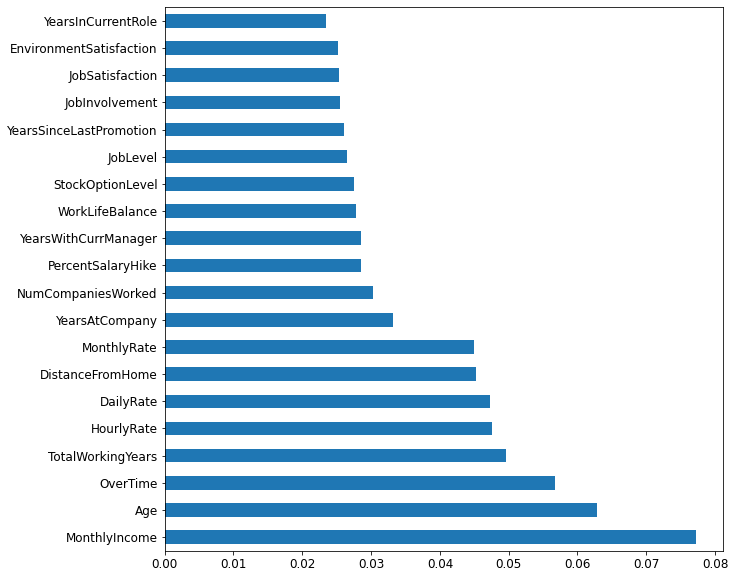

In [86]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

#### <a style="color:blue;">Decision Tree</a>

MonthlyIncome           0.085963
TotalWorkingYears       0.083966
DistanceFromHome        0.073460
DailyRate               0.066975
OverTime                0.054620
MaritalStatus_Single    0.050831
JobSatisfaction         0.050707
HourlyRate              0.048723
NumCompaniesWorked      0.043778
Age                     0.039193
dtype: float64


<AxesSubplot:>

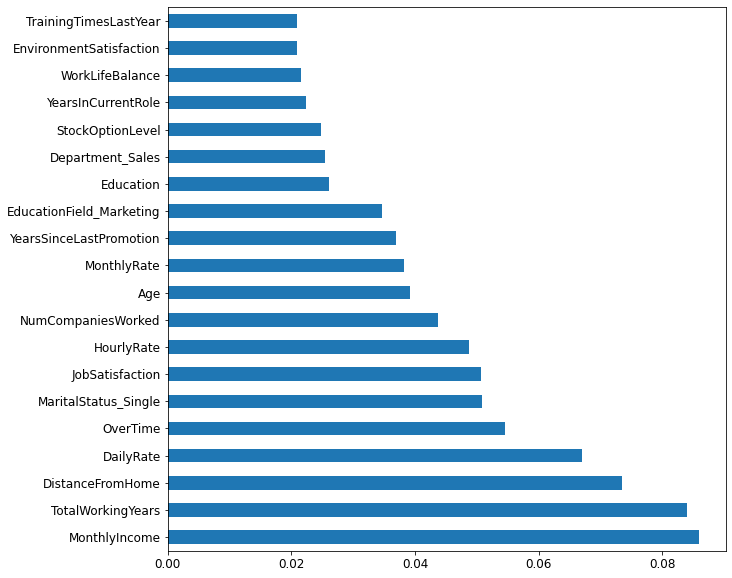

In [87]:
feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).nlargest(10))

feature_importances = feature_importances.nlargest(20)
feature_importances.plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('D:/RF Features.png')

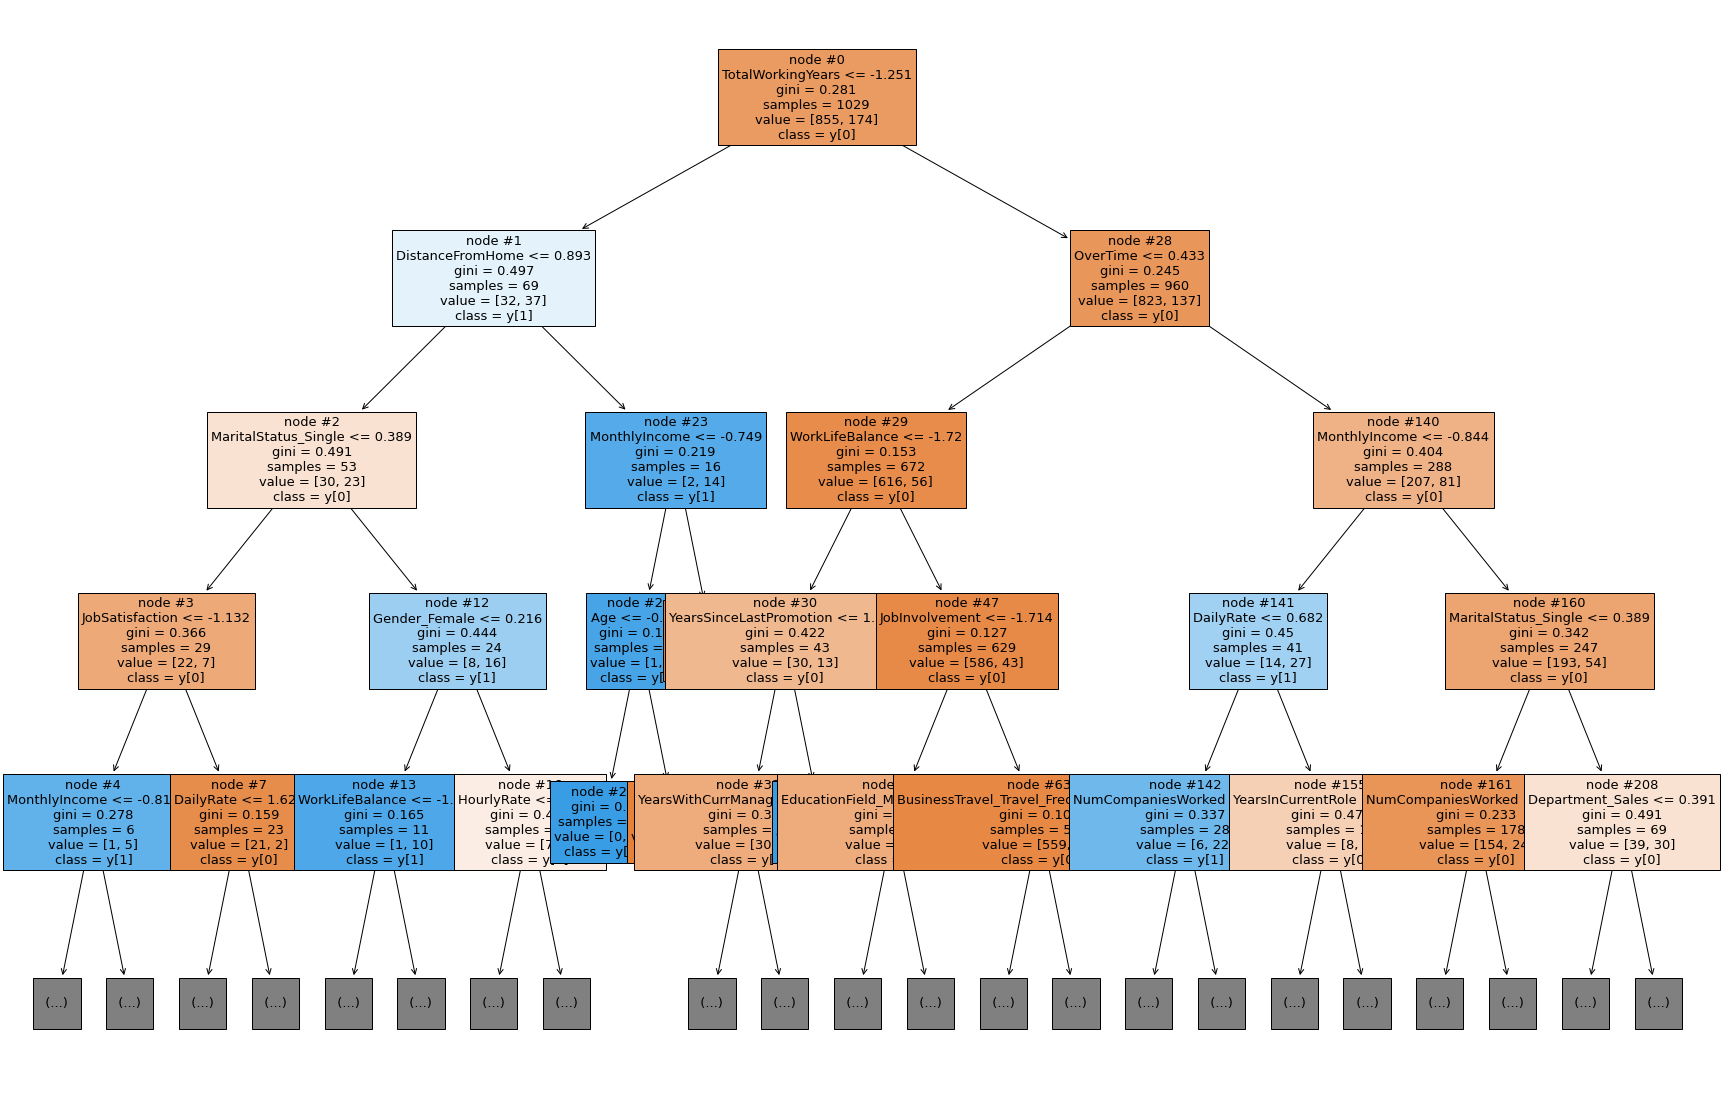

In [88]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=13,node_ids=True,class_names=True)
plt.show()

**Note:** Blue leaves represent the eligible class which is **y[1]** and the orange leaves represent the non-eligible class which is **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

- Employees who have **longer total working years**, having **overtime frequently** but have **low income** and **low daily rate** will have higher chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who have **shorter total working years**, live **far from company**, have **low income** and with a **young age** will have a higher chance of attriting. 

**Observation:**

- As **Logistic Regression** model is selected, the feature importance of the model will be interpreted. 

- The Top 10 significant variables: **overtime, years at company, years since last promotion, number of companies worked, job role, job satisfaction, job involvement, environment satisfaction, years in current role, years with current manager**

- Interpretation and Recommendation: 

    1. All the significant variables are affecting the employee to churn. 
    
    2. Employee will churn because they don't have work life balance (**over time**). The company should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance. Otherwise, the company could provide some additional incentives to employees who are working overtime in order to retain them.
    
    3. Employee will churn if they are not promoted after a few years (**years since last promotion**). The company might be able to focus on giving promotions more frequently to incentivize employees to stay.
    
    4. If the employees' duration with the current role (**years in current role**) and total working years (**total working years**) is short, the number of companies worked (**number of companies worked**) tends to be higher, the employee are most probably will churn. The company might be able to keep track of the problems that employees with less experience face in a better manner and come up with better ideas on how the management might help them. This may help to create a healthier, more welcoming environment for younger employees.
    
    5. If the employee is not satisfied with the job (**job satisfaction**) and environment (**environment satisfaction**), he or she will decided to resign. The company should focus on improving the culture and environment of the organization by coming up with new ideas to make the office environment more open and friendly.
    
    6. Employees with lower job involvement (**job involvement**) leads to a higher likelihood of attrition. This might be due to a lack of growth opportunities or a poor management style. A more pro-active, hands-on approach may be required from the managers in the organization.
    
    7. Employees traveling a greater distance to reach the workplace are more likely to attrite (**distance from home**). For such employees, the company could provide shuttle facilities so that the commute for such employees gets easier.

    8. Employees who work as laboratory technician (**job role laboratory technician**) have higher attrition rate. The company could look into their incentive schemes and try to come up with better ideas to retain these employees. 

---

## Conclusion

- Objective 1 is achieved. The relationship between factors and employee churn are identified. 
- Objective 2 is achieved. The significant factors that causes employee churn are determined. 
- Objective 3 is acheived. Churners' characteristics and probability to churn can be predicted by using Logistic Regression model. 


---

## Future Work

#### Working Mode
- The COVID-19 pandemic made working from home (WFH) the new way of working.
- More companies are offering permanent remote and hybrid work. 
- Working mode might become a significant factor of employee churn and leads to the next great distruption. 
- Article:  [Companies offering remote and hybrid work](https://www.cnbc.com/2022/04/13/10-companies-that-switched-to-permanent-hybrid-or-remote-work-and-hiring-right-now.html)

#### Employee Benefits 
- Different companies have different benefits packages. A good benefits package can make employees feel rewarded and appreciated for their work. 
- Nowadays, a good pay is not sufficient to retain a good and talented employee. 
- Benefits might become a significant factor of employee churn.
- Article: [Employers can reduce turnover with the right mix of benefits](https://www.501c.com/employers-can-reduce-turnover-with-the-right-mix-of-benefits/#:~:text=A%20new%20report%20finds%20that,a%20138%25%20decrease%20in%20turnover)

---

## Reference 

- Department of Statistics Malaysia. (2022). Retrieved from Key Statistics of Labour Force in Malaysia 2022: https://www.dosm.gov.my/v1/index.php?r=column/pdfPrev&id=UEpPd3dKQkM2ZVRnVFZ3T0w1d1Zrdz09
- Alhashmi, S. M. (2019). Towards Understanding Employee Attrition using a Decision Tree Approach. Proceeding of 2019 International Conference on Digitization: Landscaping Artificial Intelligence, ICD 2019, 44–47. https://doi.org/10.1109/ICD47981.2019.9105767
- Bandyopadhyay, N., & Jadhav, A. (2021). Churn Prediction of Employees Using Machine Learning Techniques. Tehnički Glasnik, 15(1), 51–59. https://doi.org/10.31803/tg-20210204181812
- El-Rayes, N., Fang, M., Smith, M., & Taylor, S. M. (2020). Predicting employee attrition using tree-based models. International Journal of Organizational Analysis, 28(6), 1273–1291. https://doi.org/10.1108/IJOA-10-2019-1903
- Fallucchi, F., Coladangelo, M., Giuliano, R., & De Luca, E. W. (2020). Predicting employee attrition using machine learning techniques. Computers, 9(4), 1–17. https://doi.org/10.3390/computers9040086
- Habous, A., Nfaoui, E. H., & Oubenaalla, Y. (2021). Predicting Employee Attrition using Supervised Learning Classification Models. 5th International Conference on Intelligent Computing in Data Sciences, ICDS 2021, 0–4. https://doi.org/10.1109/ICDS53782.2021.9626761
- Jain, P. K., Jain, M., & Pamula, R. (2020). Explaining and predicting employees’ attrition: a machine learning approach. SN Applied Sciences, 2(4), 1–11. https://doi.org/10.1007/s42452-020-2519-4
- Pratt, M., Boudhane, M., & Cakula, S. (2021). Employee attrition estimation using random forest algorithm. Baltic Journal of Modern Computing, 9(1), 49–66. https://doi.org/10.22364/BJMC.2021.9.1.04
- Sadana, P., & Munnuru, D. (2022). Machine Learning Model to Predict Work Force Attrition. Lecture Notes in Networks and Systems, 237, 361–376. https://doi.org/10.1007/978-981-16-6407-6_33
- Srivastava, P. R., & Eachempati, P. (2021). Intelligent Employee Retention System for Attrition Rate Analysis and Churn Prediction: An Ensemble Machine Learning and Multi- Criteria Decision-Making Approach. Journal of Global Information Management, 29(6), 1–29. https://doi.org/10.4018/JGIM.20211101.oa23
- Yahia, N. Ben, Hlel, J., & Colomo-Palacios, R. (2021). From Big Data to Deep Data to Support People Analytics for Employee Attrition Prediction. IEEE Access, 9, 60447–60458. https://doi.org/10.1109/ACCESS.2021.3074559

---